# 1. Exploratory data analysis

The dataset is data from "lending club" which offer peer-to-peer credits. To goal of this analysis is to analyze the data provided and build models for PD using decision tree & random forest models and comparing them to baseline models.

## 1.1 Attribute description

|Attribute|Description|
|---|---|
|loan_amnt             |The listed amount of the loan applied for by the borrower   |
|term                  |The number of payments on the loan. Values are in months and can be either 36 or 60.   |
|int_rate              |Interest Rate on the loan   |
|installment           |The monthly payment owed by the borrower if the loan originates.   |
|emp_title             |The job title supplied by the Borrower when applying for the loan.   |
|emp_length            |Employment length.   |
|home_ownership        |The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER   |
|annual_inc            |The self-reported annual income provided by the borrower during registration   |
|verification_status   |Indicates if income was verified by LC, not verified, or if the income source was verified   |
|issue_d               |The month which the loan was funded   |
|__loan_status__       |__Current status of the loan__   |
|purpose               |A category provided by the borrower for the loan request   |
|title                 |The loan title provided by the borrower   |
|dti                   |A ratio calculated using the borrower's total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower's self-reported monthly income   |
|earliest_cr_line      |The month the borrower’s earliest reported credit line was opened   |
|open_acc              |The number of open credit lines in the borrower’s credit file   |
|pub_rec               |Number of derogatory public records   |
|revol_bal             |Total credit revolving balance   |
|revol_util            |Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit   |
|total_acc             |The total number of credit lines currently in the borrower’s credit file   |
|initial_list_status   |The initial listing status of the loan. Possible values are – W, F   |
|application_type      |Indicates whether the loan is an individual application or a joint application with two co-borrowers   |
|mort_acc              |Number of mortgage accounts   |
|pub_rec_bankruptcies  |Number of public record bankruptcies   |
|address               |The address provided by the borrower in the loan application  |

Can be generally be grouped in different categories: 
* __Loan related__
* __Personal - Employment__
* __Personal - Assets__
* __Personal - Liabilities__
* __Personal - Other__


## 1.2 Dataset characteristics

In [192]:
# Library imports
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import matplotlib.ticker as ticker
import matplotlib.colors
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import seaborn as sns
import scipy
from scipy.stats import boxcox
from scipy import stats
from pathlib import Path
__path = Path().absolute()
__rawdata_folder_path = __path / "data"


In [15]:
# Definition of custom UZH color scheme(s)
uzh_colors_full_not_colorsorted = [
    [0.0, 0.156862745098, 0.647058823529, 1],
    [0.639215686, 0.67843137254902, 0.717647058823529, 1],
    [0.862745098039216, 0.376470588, 0.152941176470588, 1],
    [0.0431372549019608, 0.509803921568627, 0.627450980392157, 1],
    [0.164705882352941, 0.498039215686275, 0.384313725490196, 1],
    [0.568627450980392, 0.764705882352941, 0.290196078431373, 1],
    [0.996078431372549, 0.870588235294118, 0, 1],
    [0.0, 0.156862745098, 0.647058823529, 0.8],
    [0.639215686, 0.67843137254902, 0.717647058823529, 0.8],
    [0.862745098039216, 0.376470588, 0.152941176470588, 0.8],
    [0.0431372549019608, 0.509803921568627, 0.627450980392157, 0.8],
    [0.164705882352941, 0.498039215686275, 0.384313725490196, 0.8],
    [0.568627450980392, 0.764705882352941, 0.290196078431373, 0.8],
    [0.996078431372549, 0.870588235294118, 0, 0.8],
    [0.0, 0.156862745098, 0.647058823529, 0.6],
    [0.639215686, 0.67843137254902, 0.717647058823529, 0.6],
    [0.862745098039216, 0.376470588, 0.152941176470588, 0.6],
    [0.0431372549019608, 0.509803921568627, 0.627450980392157, 0.6],
    [0.164705882352941, 0.498039215686275, 0.384313725490196, 0.6],
    [0.568627450980392, 0.764705882352941, 0.290196078431373, 0.6],
    [0.996078431372549, 0.870588235294118, 0, 0.6],
    [0.0, 0.156862745098, 0.647058823529, 0.4],
    [0.639215686, 0.67843137254902, 0.717647058823529, 0.4],
    [0.862745098039216, 0.376470588, 0.152941176470588, 0.4],
    [0.0431372549019608, 0.509803921568627, 0.627450980392157, 0.4],
    [0.164705882352941, 0.498039215686275, 0.384313725490196, 0.4],
    [0.568627450980392, 0.764705882352941, 0.290196078431373, 0.4],
    [0.996078431372549, 0.870588235294118, 0, 0.4],
    [0.0, 0.156862745098, 0.647058823529, 0.2],
    [0.639215686, 0.67843137254902, 0.717647058823529, 0.2],
    [0.862745098039216, 0.376470588, 0.152941176470588, 0.2],
    [0.0431372549019608, 0.509803921568627, 0.627450980392157, 0.2],
    [0.164705882352941, 0.498039215686275, 0.384313725490196, 0.2],
    [0.568627450980392, 0.764705882352941, 0.290196078431373, 0.2],
    [0.996078431372549, 0.870588235294118, 0, 0.2]]

uzh_colors_full_colorsorted = [
    [0.0, 0.156862745098, 0.647058823529, 1],
    [0.0, 0.156862745098, 0.647058823529, 0.8],
    [0.0, 0.156862745098, 0.647058823529, 0.6],
    [0.0, 0.156862745098, 0.647058823529, 0.4],
    [0.0, 0.156862745098, 0.647058823529, 0.2],

    [0.639215686, 0.67843137254902, 0.717647058823529, 1],
    [0.639215686, 0.67843137254902, 0.717647058823529, 0.8],
    [0.639215686, 0.67843137254902, 0.717647058823529, 0.6],
    [0.639215686, 0.67843137254902, 0.717647058823529, 0.4],
    [0.639215686, 0.67843137254902, 0.717647058823529, 0.2],

    [0.862745098039216, 0.376470588, 0.152941176470588, 1],
    [0.862745098039216, 0.376470588, 0.152941176470588, 0.8],
    [0.862745098039216, 0.376470588, 0.152941176470588, 0.6],
    [0.862745098039216, 0.376470588, 0.152941176470588, 0.4],
    [0.862745098039216, 0.376470588, 0.152941176470588, 0.2],

    [0.0431372549019608, 0.509803921568627, 0.627450980392157, 1],
    [0.0431372549019608, 0.509803921568627, 0.627450980392157, 0.8],
    [0.0431372549019608, 0.509803921568627, 0.627450980392157, 0.6],
    [0.0431372549019608, 0.509803921568627, 0.627450980392157, 0.4],
    [0.0431372549019608, 0.509803921568627, 0.627450980392157, 0.2],

    [0.164705882352941, 0.498039215686275, 0.384313725490196, 1],
    [0.164705882352941, 0.498039215686275, 0.384313725490196, 0.8],
    [0.164705882352941, 0.498039215686275, 0.384313725490196, 0.6],
    [0.164705882352941, 0.498039215686275, 0.384313725490196, 0.4],
    [0.164705882352941, 0.498039215686275, 0.384313725490196, 0.2],

    [0.568627450980392, 0.764705882352941, 0.290196078431373, 1],
    [0.568627450980392, 0.764705882352941, 0.290196078431373, 0.8],
    [0.568627450980392, 0.764705882352941, 0.290196078431373, 0.6],
    [0.568627450980392, 0.764705882352941, 0.290196078431373, 0.4],
    [0.568627450980392, 0.764705882352941, 0.290196078431373, 0.2],


    [0.996078431372549, 0.870588235294118, 0, 1],
    [0.996078431372549, 0.870588235294118, 0, 0.8],
    [0.996078431372549, 0.870588235294118, 0, 0.6],
    [0.996078431372549, 0.870588235294118, 0, 0.4],
    [0.996078431372549, 0.870588235294118, 0, 0.2]]

uzh_colors_no_shades = [
    [0.0, 0.156862745098, 0.647058823529, 1],
    [0.639215686, 0.67843137254902, 0.717647058823529, 1],
    [0.862745098039216, 0.376470588, 0.152941176470588, 1],
    [0.0431372549019608, 0.509803921568627, 0.627450980392157, 1],
    [0.164705882352941, 0.498039215686275, 0.384313725490196, 1],
    [0.568627450980392, 0.764705882352941, 0.290196078431373, 1],
    [0.996078431372549, 0.870588235294118, 0, 1]]

uzh_colors_blue_orange = [
    [0.639215686, 0.67843137254902, 0.717647058823529, 1],
    [0.639215686, 0.67843137254902, 0.717647058823529, 0.8],

    [0.0, 0.156862745098, 0.647058823529, 1],
    [0.0, 0.156862745098, 0.647058823529, 0.8],

    [0.862745098039216, 0.376470588, 0.152941176470588, 1],
    [0.862745098039216, 0.376470588, 0.152941176470588, 0.8]]


# UZH colormap generation
uzh_colors_full_not_colorsorted_colormap = ListedColormap(
    uzh_colors_full_not_colorsorted)
uzh_colors_full_colorsorted_colormap = ListedColormap(
    uzh_colors_full_colorsorted)
uzh_colors_no_shades_colormap = ListedColormap(uzh_colors_no_shades)
uzh_colors_blue_orange_colormap = ListedColormap(uzh_colors_blue_orange)


def reduced_colormap(colormap, number_of_colors_needed):

    reduced_cm = colormap(range(0, number_of_colors_needed))
    return(ListedColormap(reduced_cm))


In [16]:
# Import (raw) dataset

def source_rawdata(rawdata_folder_path):

    dataset_pd = pd.DataFrame()

    for data_file in os.listdir(rawdata_folder_path):
        __filepath = rawdata_folder_path / data_file
        # Manually fixed the entry of line 10153 in file 2 as it contained additional /" characters causing import issues
        dataset_pd = pd.concat([dataset_pd, pd.read_table(
            __filepath, quotechar='"', verbose=False)])

    return dataset_pd


imported_dataset_df = source_rawdata(__rawdata_folder_path)
# Reset index to remove duplicate indices resulting from the import of these different files
imported_dataset_df = imported_dataset_df.reset_index(drop=True)
# Prohibit duplicate indices for this dataframe in the future
imported_dataset_df.flags.allows_duplicate_labels = False

In [17]:
# Check for duplicates
print('Number of duplicated rows: ',
      imported_dataset_df[imported_dataset_df.duplicated()].shape[0])


Number of duplicated rows:  0


In [18]:
# Get number of items & attributes in dataset
print('Number of items in raw dataset: ', imported_dataset_df.shape[0])
print('Number of attributes in raw dataset: ', imported_dataset_df.shape[1])


Number of items in raw dataset:  396030
Number of attributes in raw dataset:  25


### 1.2.1 Overall dataset

* Dataset does not contain duplicates
* Dataset contains 396030 entries with 25 attributes each

Attributes with missing values
                      count
emp_title             22927
emp_length            18301
title                  1755
revol_util              276
mort_acc              37795
pub_rec_bankruptcies    535


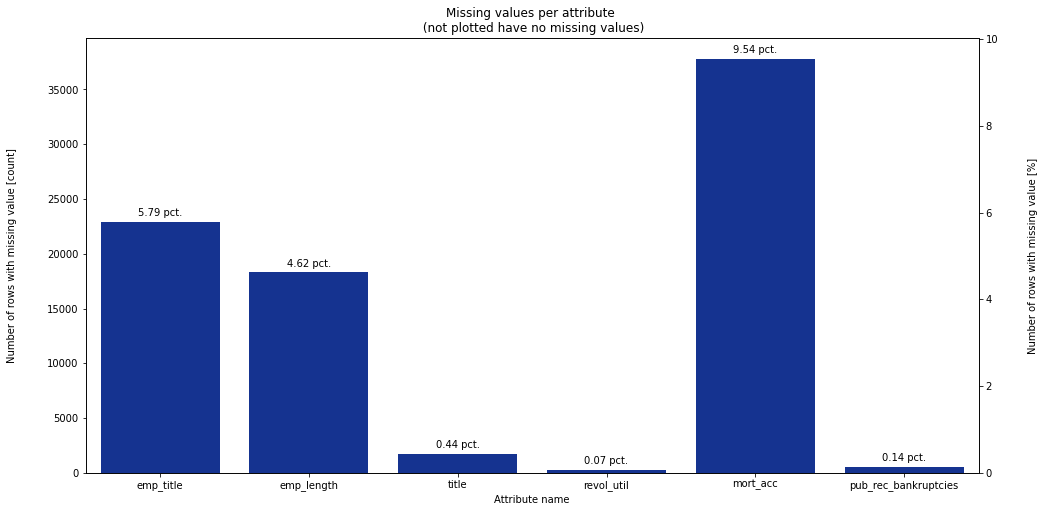

In [19]:
# Identification of missing values
null_df = imported_dataset_df.apply(
    lambda x: sum(x.isnull())).to_frame(name='count')
null_df = null_df[null_df['count'] != 0]
print('Attributes with missing values')
print(null_df)

plt_title = 'Missing values per attribute \n (not plotted have no missing values)'
plt_y_left_label = 'Number of rows with missing value [%]'
plt_y_right_label = 'Number of rows with missing value [count]'
plt_x_label = 'Attribute name'
plt.figure(figsize=(16, 8))
ax = sns.barplot(x=null_df.index, y=null_df['count'], color=uzh_colors_blue_orange[2])
ax.lines[0].set_color(uzh_colors_blue_orange[0])
plt.title(plt_title)
plt.xlabel(plt_x_label)

# Make twin axis
ax2 = ax.twinx()

# Define y-axis positions
ax.yaxis.set_label_position('left')
ax2.yaxis.set_label_position('right')

# Add percentage values
ncount = len(imported_dataset_df)
ax2 = sns.barplot(x=null_df.index, y=(
    null_df['count']/ncount)*100, color=uzh_colors_blue_orange[2])

# Set y-axis labels
ax2.set_ylabel(plt_y_left_label, labelpad=30)
ax.set_ylabel(plt_y_right_label, labelpad=30)

# Add percentage value on bars
for i in ax2.containers:
    ax2.bar_label(i, fmt='%.2f pct.', padding=4)


Text(140.0, 0.5, 'Item index')

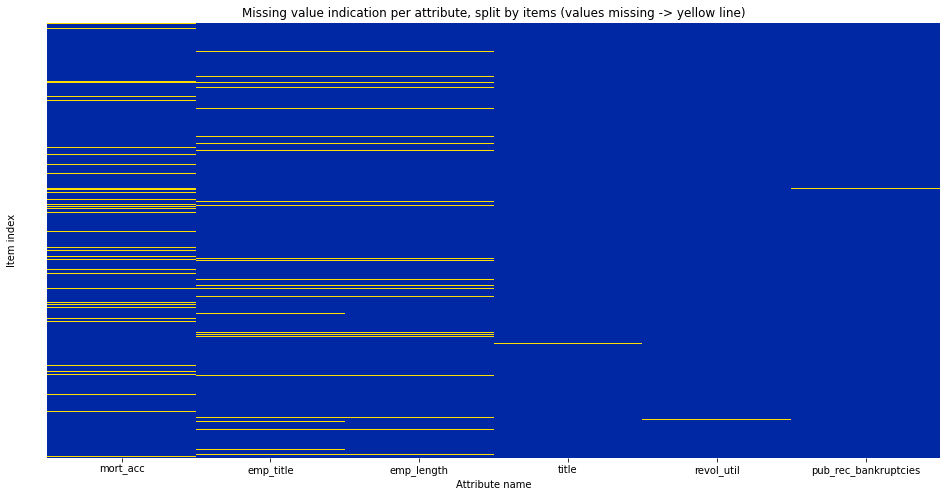

In [20]:
# Missing value item heatmap
plt_title = 'Missing value indication per attribute, split by items (values missing -> yellow line)'
plt_y_left_label = 'Item index'
plt_x_label = 'Attribute name'
plt.figure(figsize=(16, 8))
ax = sns.heatmap(imported_dataset_df[['mort_acc', 'emp_title', 'emp_length', 'title', 'revol_util', 'pub_rec_bankruptcies']].isnull(), yticklabels=False, cbar=False, cmap= uzh_colors_no_shades_colormap)
plt.title(plt_title)
plt.xlabel(plt_x_label)
ax.set_ylabel(plt_y_left_label, labelpad=30)

### 1.2.2 Missing values

* There are 6 attributes with missing values: emp_title, emp_length, title, revol_util, mort_acc, pub_rec_bankruptcies

In [21]:
# Analysis of missing value attribute composition
for i in null_df.index:
    print('Attribute: ' + i)
    print(imported_dataset_df[i].unique())
    print('There are ' +
          str(len(imported_dataset_df[i].unique())) + ' different values')
    print('\n')


Attribute: emp_title
['Marketing' 'Credit analyst ' 'Statistician' ...
 "Michael's Arts & Crafts" 'licensed bankere' 'Gracon Services, Inc']
There are 173106 different values


Attribute: emp_length
['10+ years' '4 years' '< 1 year' '6 years' '9 years' '2 years' '3 years'
 '8 years' '7 years' '5 years' '1 year' nan]
There are 12 different values


Attribute: title
['Vacation' 'Debt consolidation' 'Credit card refinancing' ...
 'Credit buster ' 'Loanforpayoff' 'Toxic Debt Payoff']
There are 48818 different values


Attribute: revol_util
[ 41.8   53.3   92.2  ...  56.26 111.4  128.1 ]
There are 1227 different values


Attribute: mort_acc
[ 0.  3.  1.  4.  2.  6.  5. nan 10.  7. 12. 11.  8.  9. 13. 14. 22. 34.
 15. 25. 19. 16. 17. 32. 18. 24. 21. 20. 31. 28. 30. 23. 26. 27.]
There are 34 different values


Attribute: pub_rec_bankruptcies
[ 0.  1.  2.  3. nan  4.  5.  6.  7.  8.]
There are 10 different values




### 1.2.2 Missing values (cont.)

#### 1.2.2.1 emp_title

There are a lot of different values, that also contain typos or are very specific (e.g. 'Michael's Arts & Crafts'). Therefore, it is assumed that the added model value is minimal. Attribute will be dropped.

#### 1.2.2.2 emp_length

Values range from '<1 year' to '10+ years'. Might be a relevant attribute - higher employment length might indicate more stable job and therefore higher likelihood of a continous income which in turn might be relevant for loan payback.

Therefore, missing value imputation strategy will be considered later on (e.g. mean, median or correlated with other attributes). 

#### 1.2.2.3 title

There are a lot of different values for the loan title, as the title was provided by the borrower it is assumed that there is no particular value in it. Attribute will be dropped.

Examples: 'Dream Wedding for my lil girl', 'Ducks in a Row', 'MyLoan', 'Proven Borrower with Strong Track Record'

#### 1.2.2.4 revol_util

Revolving line utilization rate might be a relevant attribute - higher utilization rate might indicate that borrower "maxes out all credit", i.e. needs all credit capacity to finance his obligations, which in turn might indicate that they don't have enough income to pay their regular obligations.

However, only 0.07% have missing values, so items with missing attribute value can most likely be dropped without major impact on model quality.

#### 1.2.2.5 mort_acc

Might be relevant, as someone with a lot of mortgage accounts might have a lot of other debt obligations and therefore might be more likely to default on the given loan.

Additional analysis will be performed to impute missing values based on home ownership status. Additional considerations might be taken into account based on correlation with other attributes.


#### 1.2.2.6 pub_rec_bankruptcies

Might be relevant, as someone that already defaulted on a loan might be more likely to default again.

Only 0.14% have missing values, so items might be dropped without impacting the model much.



Text(0.5, 0, 'Home ownership status')

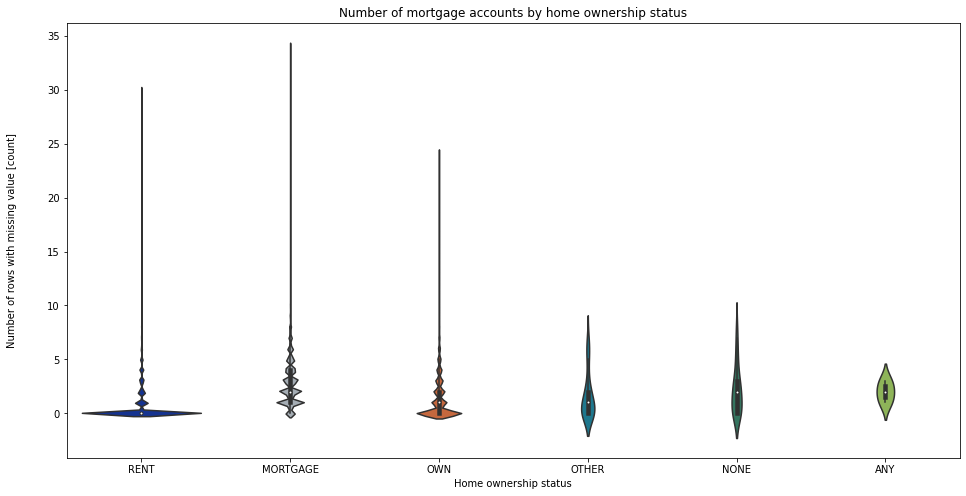

In [22]:
# Violin plot no. mortgage accounts by home ownership status
plt.figure(figsize=(16, 8))
ax = sns.violinplot(x='home_ownership',y='mort_acc',data=imported_dataset_df, palette= uzh_colors_no_shades)

plt_title = 'Number of mortgage accounts by home ownership status'
plt_y_left_label = 'Number of mortgage accounts'
plt_x_label = 'Home ownership status'

ax.set_ylabel(plt_y_right_label, labelpad=30)
plt.title(plt_title)
plt.xlabel(plt_x_label)


In [23]:
# Analysis correlation missing number mortgage accounts and loan status
home_own_mort_acc_compare_df = imported_dataset_df[imported_dataset_df['mort_acc'].isnull()]

grouped_frame = home_own_mort_acc_compare_df.groupby(['home_ownership','loan_status'])['loan_amnt'].count()
print(grouped_frame.head(20))
print('\n')

print('Ratios of charged of loans vs. total loans on missing no. mortgage accounts')
print('Ratio for type = "MORTGAGE"', str(round(grouped_frame[0]/(grouped_frame[0]+grouped_frame[1]),2)) + ' %')
print('Ratio for type = "OWN"', str(round(grouped_frame[5]/(grouped_frame[5]+grouped_frame[6]),2)) + ' %')
print('Ratio for type = "RENT"', str(round(grouped_frame[7]/(grouped_frame[7]+grouped_frame[8]),2)) + ' %')

home_ownership  loan_status
MORTGAGE        Charged Off     2254
                Fully Paid     14388
NONE            Fully Paid         2
OTHER           Charged Off        9
                Fully Paid        69
OWN             Charged Off      459
                Fully Paid      2508
RENT            Charged Off     2828
                Fully Paid     15278
Name: loan_amnt, dtype: int64


Ratios of charged of loans vs. total loans on missing no. mortgage accounts
Ratio for type = "MORTGAGE" 0.14 %
Ratio for type = "OWN" 0.15 %
Ratio for type = "RENT" 0.16 %


#### 1.2.2.5 mort_acc (cont.)

Analysis shows that most renting have 0 mortgages (which is expected), so for renting missing values will be imputed as 0.

For other categories the median of their respective home ownership status will be used to impute missing numbers of mortgage accounts.

### 1.2.3 Dependent variable definition and distribution

'Loan status' is the dependent variable indicating if a loan defaulted ('charged off') or was successfully paid back ('fully paid'). 

The distribution shows that roughly 20% of the loans are defaulted.

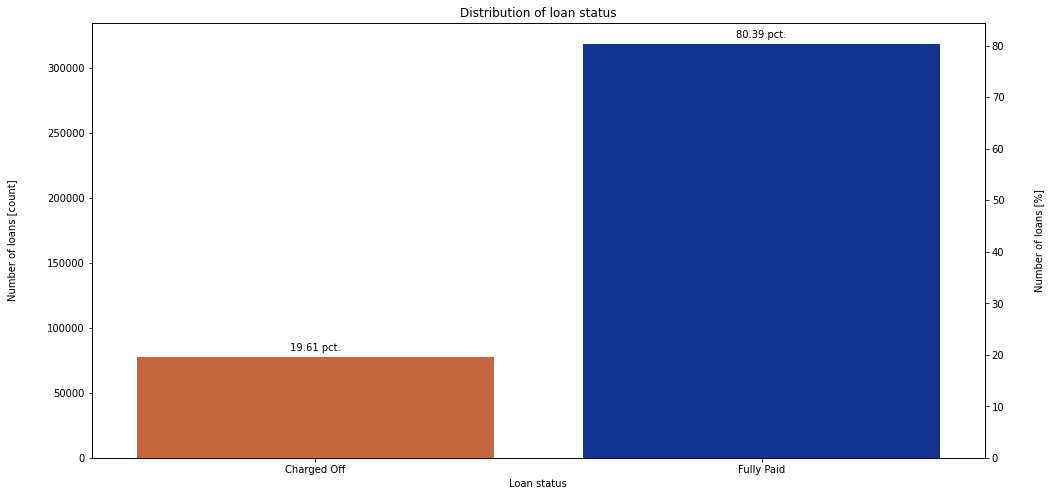

In [24]:
# Plot distribution for loan status
grouped_dep_var_dataframe = imported_dataset_df.groupby(['loan_status']).count()

plt_title = 'Distribution of loan status'
plt_y_left_label = 'Number of loans [%]'
plt_y_right_label = 'Number of loans [count]'
plt_x_label = 'Loan status'
plt.figure(figsize=(16, 8))
ax = sns.barplot(x = grouped_dep_var_dataframe.index, y = grouped_dep_var_dataframe['loan_amnt'], palette = uzh_colors_no_shades[2:3]+uzh_colors_no_shades[0:1])
plt.title(plt_title)
plt.xlabel(plt_x_label)

# Make twin axis
ax2 = ax.twinx()

# Define y-axis positions
ax.yaxis.set_label_position('left')
ax2.yaxis.set_label_position('right')

# Add percentage values
ncount = len(imported_dataset_df)
ax2 = sns.barplot(x=grouped_dep_var_dataframe.index, y=(grouped_dep_var_dataframe['loan_amnt']/ncount)*100, palette = uzh_colors_no_shades[2:3]+uzh_colors_no_shades[0:1])

# Set y-axis labels
ax2.set_ylabel(plt_y_left_label, labelpad=30)
ax.set_ylabel(plt_y_right_label, labelpad=30)

# Add percentage value on bars
for i in ax2.containers:
    ax2.bar_label(i, fmt='%.2f pct.', padding=4)

### 1.2.4 Numeric attributes




In [25]:
# Statistical parameters of numerical attributes
imported_dataset_df.describe().T

count          mean           std     min       25%  \
loan_amnt             396030.0  14113.888089   8357.441341  500.00   8000.00   
int_rate              396030.0     13.639400      4.472157    5.32     10.49   
installment           396030.0    431.849698    250.727790   16.08    250.33   
annual_inc            396030.0  74203.175798  61637.621158    0.00  45000.00   
dti                   396030.0     17.379514     18.019092    0.00     11.28   
open_acc              396030.0     11.311153      5.137649    0.00      8.00   
pub_rec               396030.0      0.178191      0.530671    0.00      0.00   
revol_bal             396030.0  15844.539853  20591.836109    0.00   6025.00   
revol_util            395754.0     53.791749     24.452193    0.00     35.80   
total_acc             396030.0     25.414744     11.886991    2.00     17.00   
mort_acc              358235.0      1.813991      2.147930    0.00      0.00   
pub_rec_bankruptcies  395495.0      0.121648      0.356174    0.00      0.00   

                           50%       75%         max  
loan_amnt             12000.00  20000.00    40000.00  
int_rate                 13.33     16.49       30.99  
installment             375.43    567.30     1533.81  
annual_inc            64000.00  90000.00  8706582.00  
dti                      16.91     22.98     9999.00  
open_acc                 10.00     14.00       90.00  
pub_rec                   0.00      0.00       86.00  
revol_bal             11181.00  19620.00  1743266.00  
revol_util               54.80     72.90      892.30  
total_acc                24.00     32.00      151.00  
mort_acc                  1.00      3.00       34.00  
pub_rec_bankruptcies      0.00      0.00        8.00

### 1.2.5 Dependent/independent variable correlations

# TODO PAIRPLOTS & correlation matrices GO HERE (see other notebook)

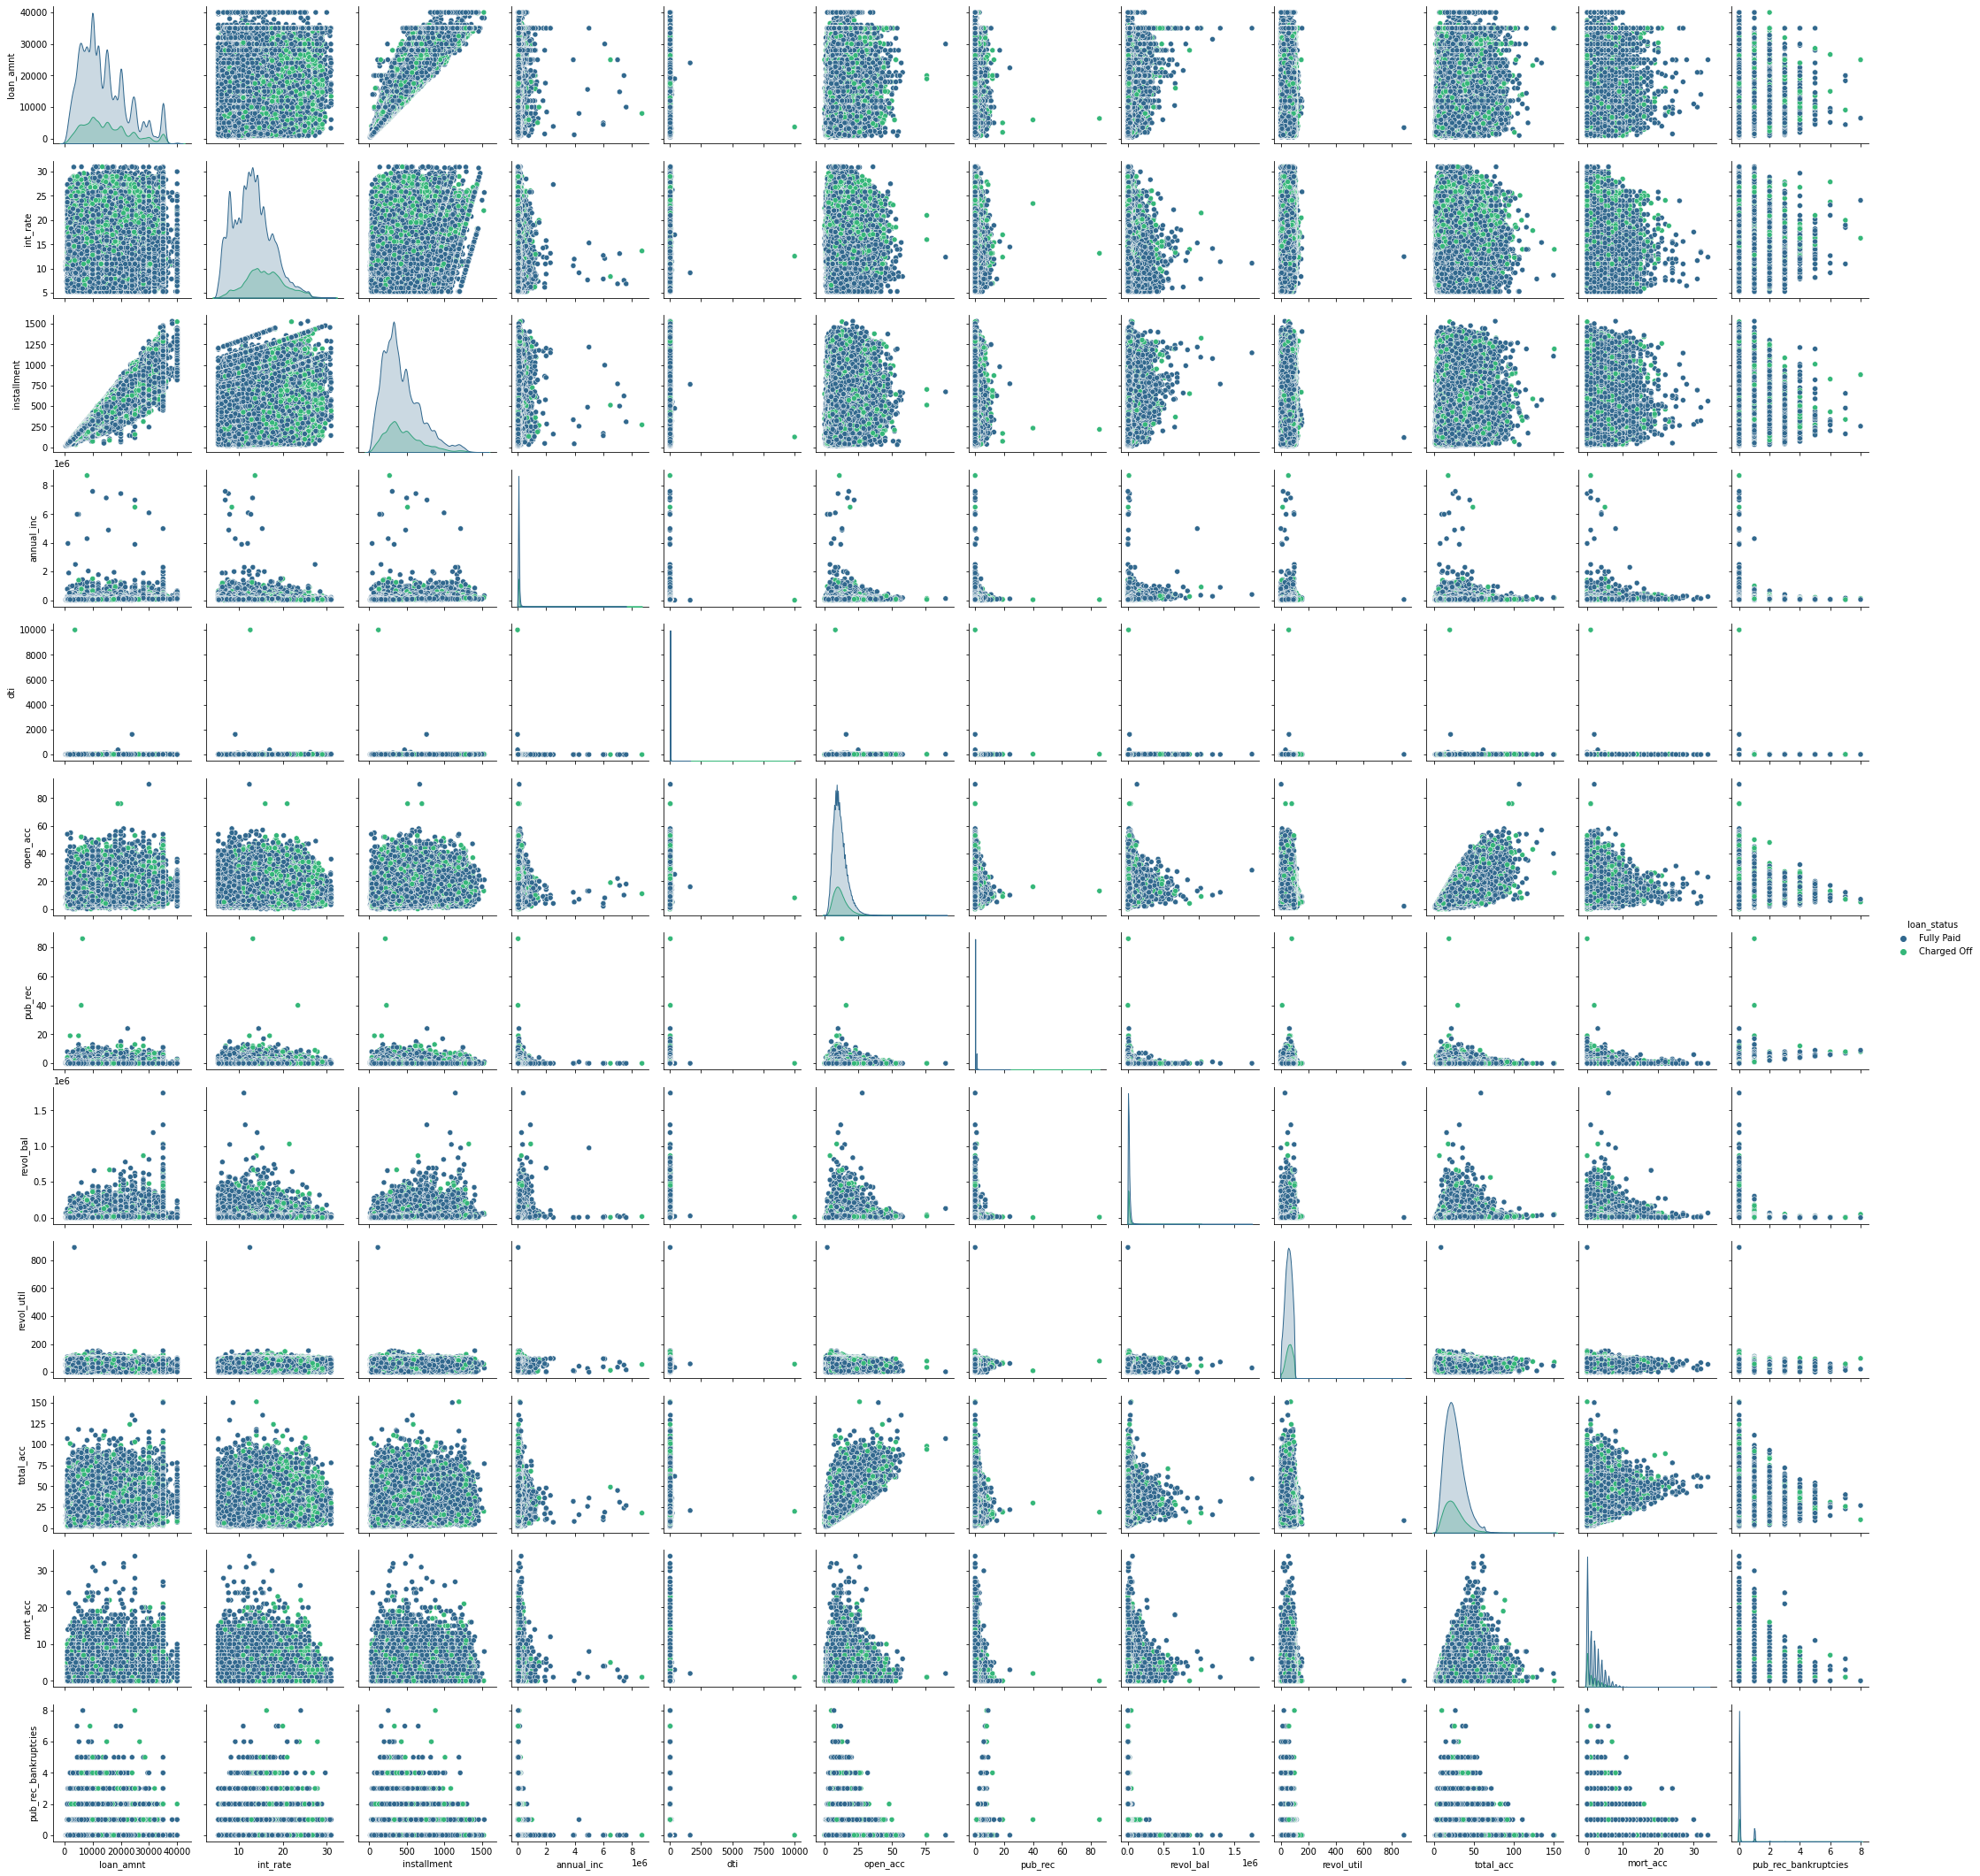

In [ ]:
#sns.pairplot(imported_dataset_df, palette = 'viridis', hue = 'loan_status')

c:\Users\cronus_win11\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0, 0.5, 'Density of log10(annual_inc)')

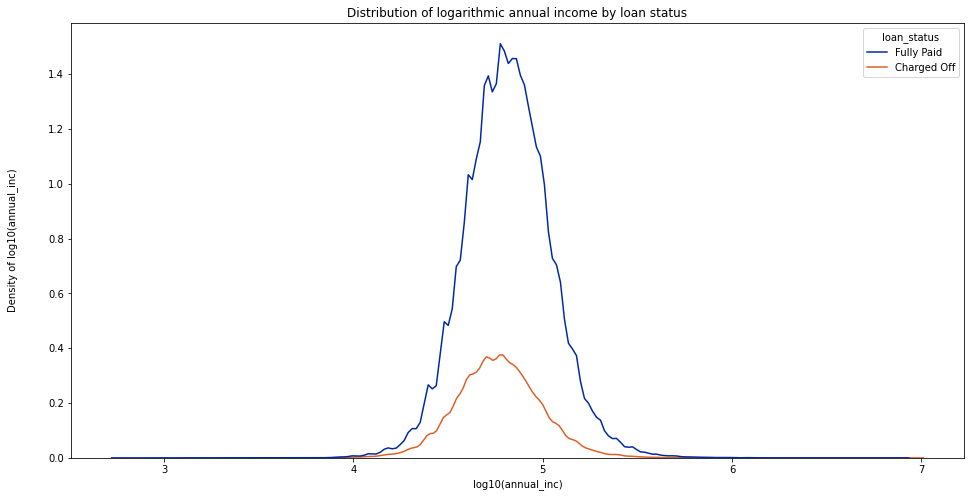

In [27]:
# Distribution plot for log(annual_inc)

plt_title = 'Distribution of logarithmic annual income by loan status'
plt_y_left_label = 'Density of log10(annual_inc)'
plt_x_label = 'log10(annual_inc)'
plt.figure(figsize=(16, 8))
ax = sns.kdeplot(x = np.log10(imported_dataset_df['annual_inc']), hue = imported_dataset_df['loan_status'], palette = uzh_colors_no_shades[0:1]+uzh_colors_no_shades[2:3])
plt.title(plt_title)
plt.xlabel(plt_x_label)
ax.set_ylabel(plt_y_left_label, labelpad=30)

c:\Users\cronus_win11\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0, 0.5, 'Density of log10(dti)')

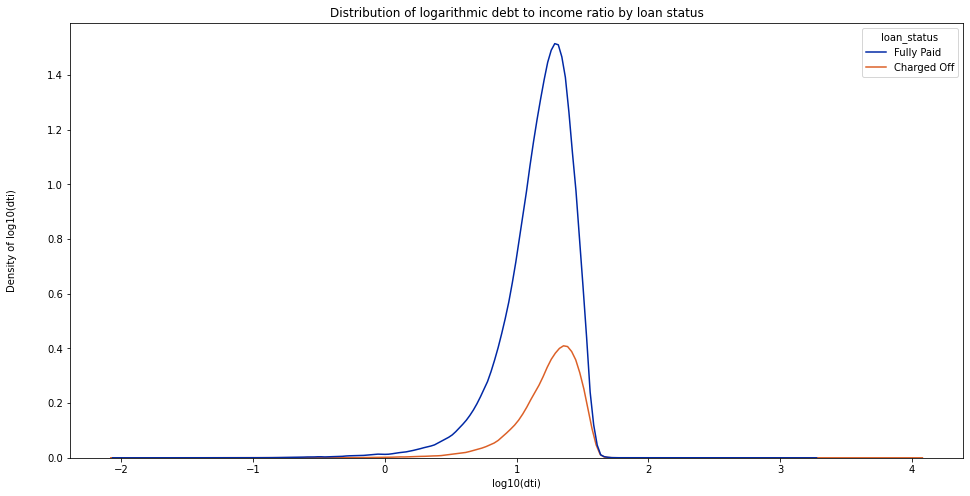

In [28]:
# Distribution plot for log(dti)

plt_title = 'Distribution of logarithmic debt to income ratio by loan status'
plt_y_left_label = 'Density of log10(dti)'
plt_x_label = 'log10(dti)'
plt.figure(figsize=(16, 8))
ax = sns.kdeplot(x = np.log10(imported_dataset_df['dti']), hue = imported_dataset_df['loan_status'], palette = uzh_colors_no_shades[0:1]+uzh_colors_no_shades[2:3])
plt.title(plt_title)
plt.xlabel(plt_x_label)
ax.set_ylabel(plt_y_left_label, labelpad=30)

c:\Users\cronus_win11\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0, 0.5, 'Density of log10(revol_bal)')

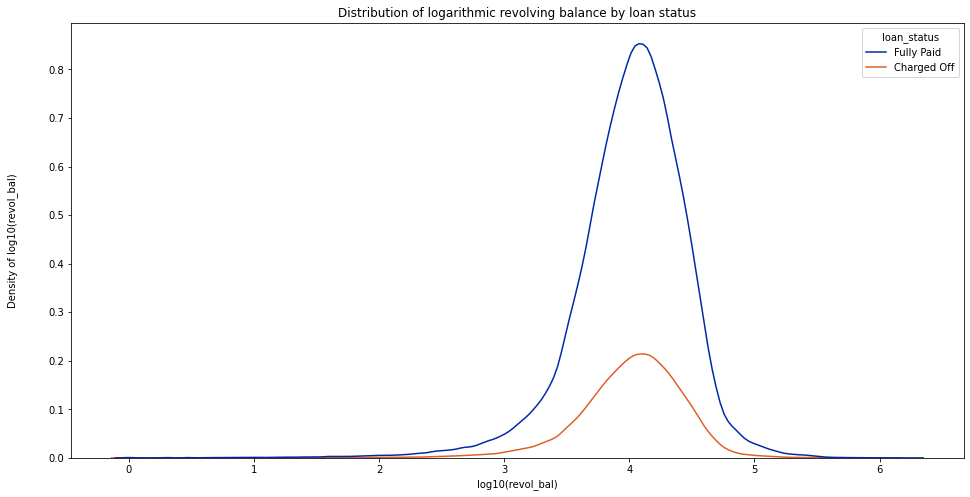

In [29]:
# Distribution plot for log(revol_bal)

plt_title = 'Distribution of logarithmic revolving balance by loan status'
plt_y_left_label = 'Density of log10(revol_bal)'
plt_x_label = 'log10(revol_bal)'
plt.figure(figsize=(16, 8))
ax = sns.kdeplot(x = np.log10(imported_dataset_df['revol_bal']), hue = imported_dataset_df['loan_status'], palette = uzh_colors_no_shades[0:1]+uzh_colors_no_shades[2:3])
plt.title(plt_title)
plt.xlabel(plt_x_label)
ax.set_ylabel(plt_y_left_label, labelpad=30)

Text(0, 0.5, 'Density of log10(loan_amnt)')

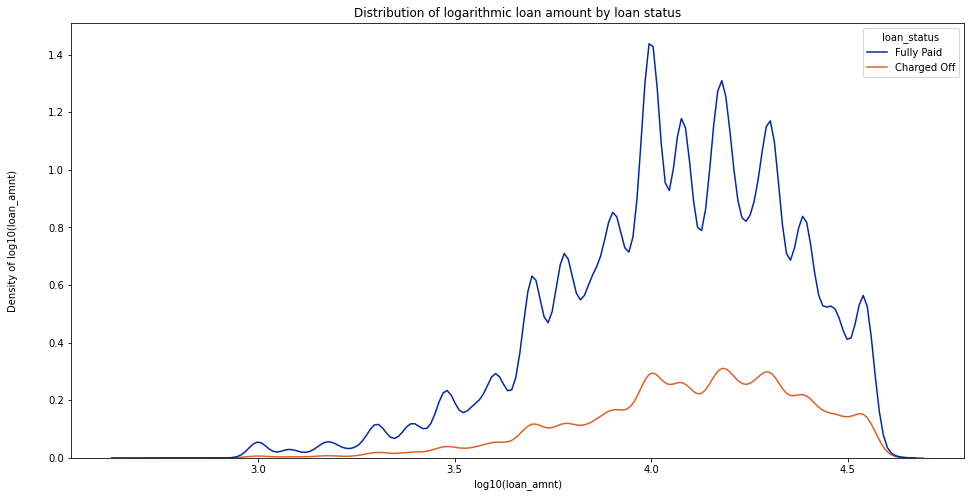

In [30]:
# Distribution plot for log(loan_amnt)

plt_title = 'Distribution of logarithmic loan amount by loan status'
plt_y_left_label = 'Density of log10(loan_amnt)'
plt_x_label = 'log10(loan_amnt)'
plt.figure(figsize=(16, 8))
ax = sns.kdeplot(x = np.log10(imported_dataset_df['loan_amnt']), hue = imported_dataset_df['loan_status'], palette = uzh_colors_no_shades[0:1]+uzh_colors_no_shades[2:3])
plt.title(plt_title)
plt.xlabel(plt_x_label)
ax.set_ylabel(plt_y_left_label, labelpad=30)

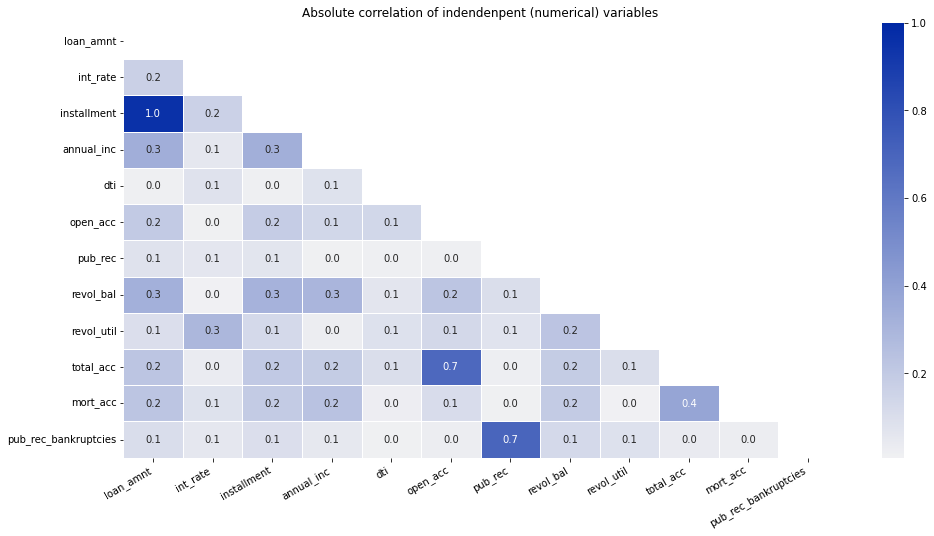

In [31]:
# Absolute correlation map of independent (numerical) variables

corrmat = imported_dataset_df.corr()
corrmat = abs(corrmat)

#reduced_map = reduced_colormap(uzh_colors_no_shades_colormap)#.reversed()



f, ax = plt.subplots(figsize=(16, 8))

mask = np.triu(np.ones_like(corrmat, dtype=bool))

sns.heatmap(corrmat, vmax = 1, annot = True, linewidths = 0.5, mask = mask, cmap = sns.light_palette("#0028A5", as_cmap=True), fmt = '.1f')


plt_title = 'Absolute correlation of indendenpent (numerical) variables'

plt.title(plt_title)


plt.xticks(rotation = 30, horizontalalignment = 'right')

plt.show()

In [82]:
## Exploratory analsis of address attribute
address_zip_array = imported_dataset_df['address'].apply(lambda x: x[-5:])
address_state_array = imported_dataset_df['address'].apply(lambda x: x[-8:-6])

random_sample_index = np.random.randint(0,len(imported_dataset_df))

print('exemplary address: ' + imported_dataset_df['address'][random_sample_index])
print('exemplary extracted zipcode: ' + address_zip_array[random_sample_index])
print('exemplary extracted state: ' + address_state_array[random_sample_index])

exemplary address: 94139 Jennings Shore Suite 519
North Melissaside, WA 30723
exemplary extracted zipcode: 30723
exemplary extracted state: WA


<AxesSubplot:xlabel='loan_amnt', ylabel='term'>

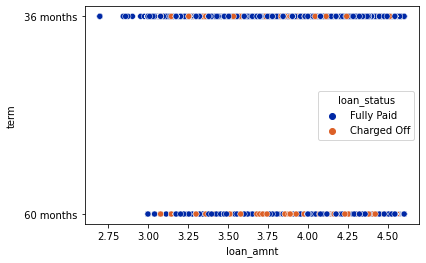

In [33]:
sns.scatterplot(x = np.log10(imported_dataset_df['loan_amnt']), y = (imported_dataset_df['term']), hue = imported_dataset_df['loan_status'],palette = uzh_colors_no_shades[0:1]+uzh_colors_no_shades[2:3])

### 1.2.6 Outlier detection and handling

Outliers can easily be identified in the pairplots, but decision was taken to keep them in the dataset as these are especially relevant in the credit analysis context.

In [217]:
## Potentially add some box plots to show univariate outliers

# 2 Data processing and modeling
## 2.1 Data cleansing and missing value imputation 

Based on the previous analysis the following decisions are made:

* Missing value imputation strategy
    - __emp_title__: Attribute will be dropped 
    - __emp_length__: Heavily skewed as 10+ is a larger bin than all the others, missing values will therefore be imputed using mode.
    - __title__: Attribute will be dropped  
    - __revol_util__: Only a small amount of items are missing this, these will be dropped.
    - __mort_acc__: Correlates somehow with __open_acc__ and therefore will be dropped
    - __pub_rec_bankcruptcies__: Only a small amount of items are missing this, these will be dropped.
_____
* Transformation of attributes
    - __income__: Take log10 of attribute to utilize properties of normal distribution
    - __dti__: Take log10 of attribute to utilize properties of (heavily skewed) normal distribution
    - __revol_bal__: Take log10 of attribute to utilize properties of normal distribution
    - __address__:  Has format of [HouseNr Street\r\nCity, STATE zipcode] (e.g. "0174 Michelle Gateway\r\nMendozaberg, OK 22690")      
                    For sure not every information will be relevant, but state and zipcode might be relevant, so these will be extracted as categorical values to be used for the model.   
                    state will be labeled as __address_state__  
                    zipcode will be labeled as __address_zipcode__  
                    it is expected that __address_state__ and __address_zipcode__ are perfectly correlated, so both will never be used in the same model   
                    __address__ will be dropped consequently  
    - __credit_history_time__: Newly derived attribute, that indicates "credit history age" (in years) of the borrower (i.e. how long ago they took their first loan, compared to this loan)
    
_____
* Removal of attributes where no added model benefit is expected
    - __issue_d__: Will be transformed into date time object and used to subsequently calculate ___credit_history_time__ (see above), resulting __issue_d_month__ will be kept. Will be dropped afterwards.
    - __issue_d_year__: Will be dropped as year in the past has no value for prediction of the future
    - __earliest_cr_line__: Will be transformed into date time object and used to subsequently calculate ___credit_history_time__ (see above). Will be dropped afterwards.
    - __earliest_cr_line_year__: Will be dropped as year in the past has no value for prediction of the future
    - __earliest_cr_line_month__: Will be dropped as month for this first credit line in the past has no value for prediction of the future
    - __installments__: Perfect correlation with loan_amnt, as loans need to be paid back linearly (installment = loan_amnt/term)
    - __total_acc__: Correclates highly with __open_acc__. As open accounts should be more relevant to the overall ability to pay back the loan, __open_acc__ will be kept and __total_acc__ be dropped.




Text(0, 0.5, 'Count of occurences')

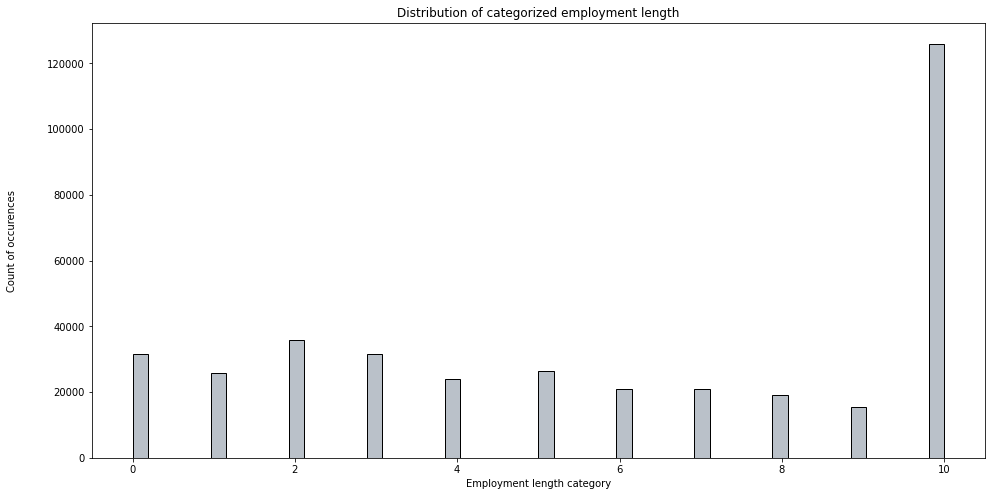

In [34]:
# Convert emp_length to numerical attribute
imported_dataset_df['emp_length'].unique()

imported_dataset_df['emp_length_numerical'] = imported_dataset_df['emp_length'].replace({"10+ years":"10",
                                                                                            "< 1 year":"0",
                                                                                            "1 year":"1",                                                                                          
                                                                                            "2 years":"2",
                                                                                            "3 years":"3",
                                                                                            "4 years":"4",
                                                                                            "5 years":"5",
                                                                                            "6 years":"6",
                                                                                            "7 years":"7",
                                                                                            "8 years":"8",
                                                                                            "9 years":"9"})

imported_dataset_df['emp_length_numerical'] = imported_dataset_df['emp_length_numerical'].astype(float)




plt_title = 'Distribution of categorized employment length'
plt_y_left_label = 'Count of occurences'
plt_x_label = 'Employment length category'
plt.figure(figsize=(16, 8))
ax = sns.histplot(x= imported_dataset_df['emp_length_numerical'].astype(float), color = uzh_colors_no_shades[1])
plt.title(plt_title)
plt.xlabel(plt_x_label)
ax.set_ylabel(plt_y_left_label, labelpad=30)

In [35]:
# Correlation of numerical employment length derived attribute

imported_dataset_df.corr()['emp_length_numerical']

loan_amnt               0.100087
int_rate                0.012464
installment             0.088601
annual_inc              0.067569
dti                     0.041697
open_acc                0.043565
pub_rec                 0.037494
revol_bal               0.087731
revol_util              0.038223
total_acc               0.117836
mort_acc                0.198494
pub_rec_bankruptcies    0.038690
emp_length_numerical    1.000000
Name: emp_length_numerical, dtype: float64

# TODO PAIRPLOTS GO HERE (see other notebook)

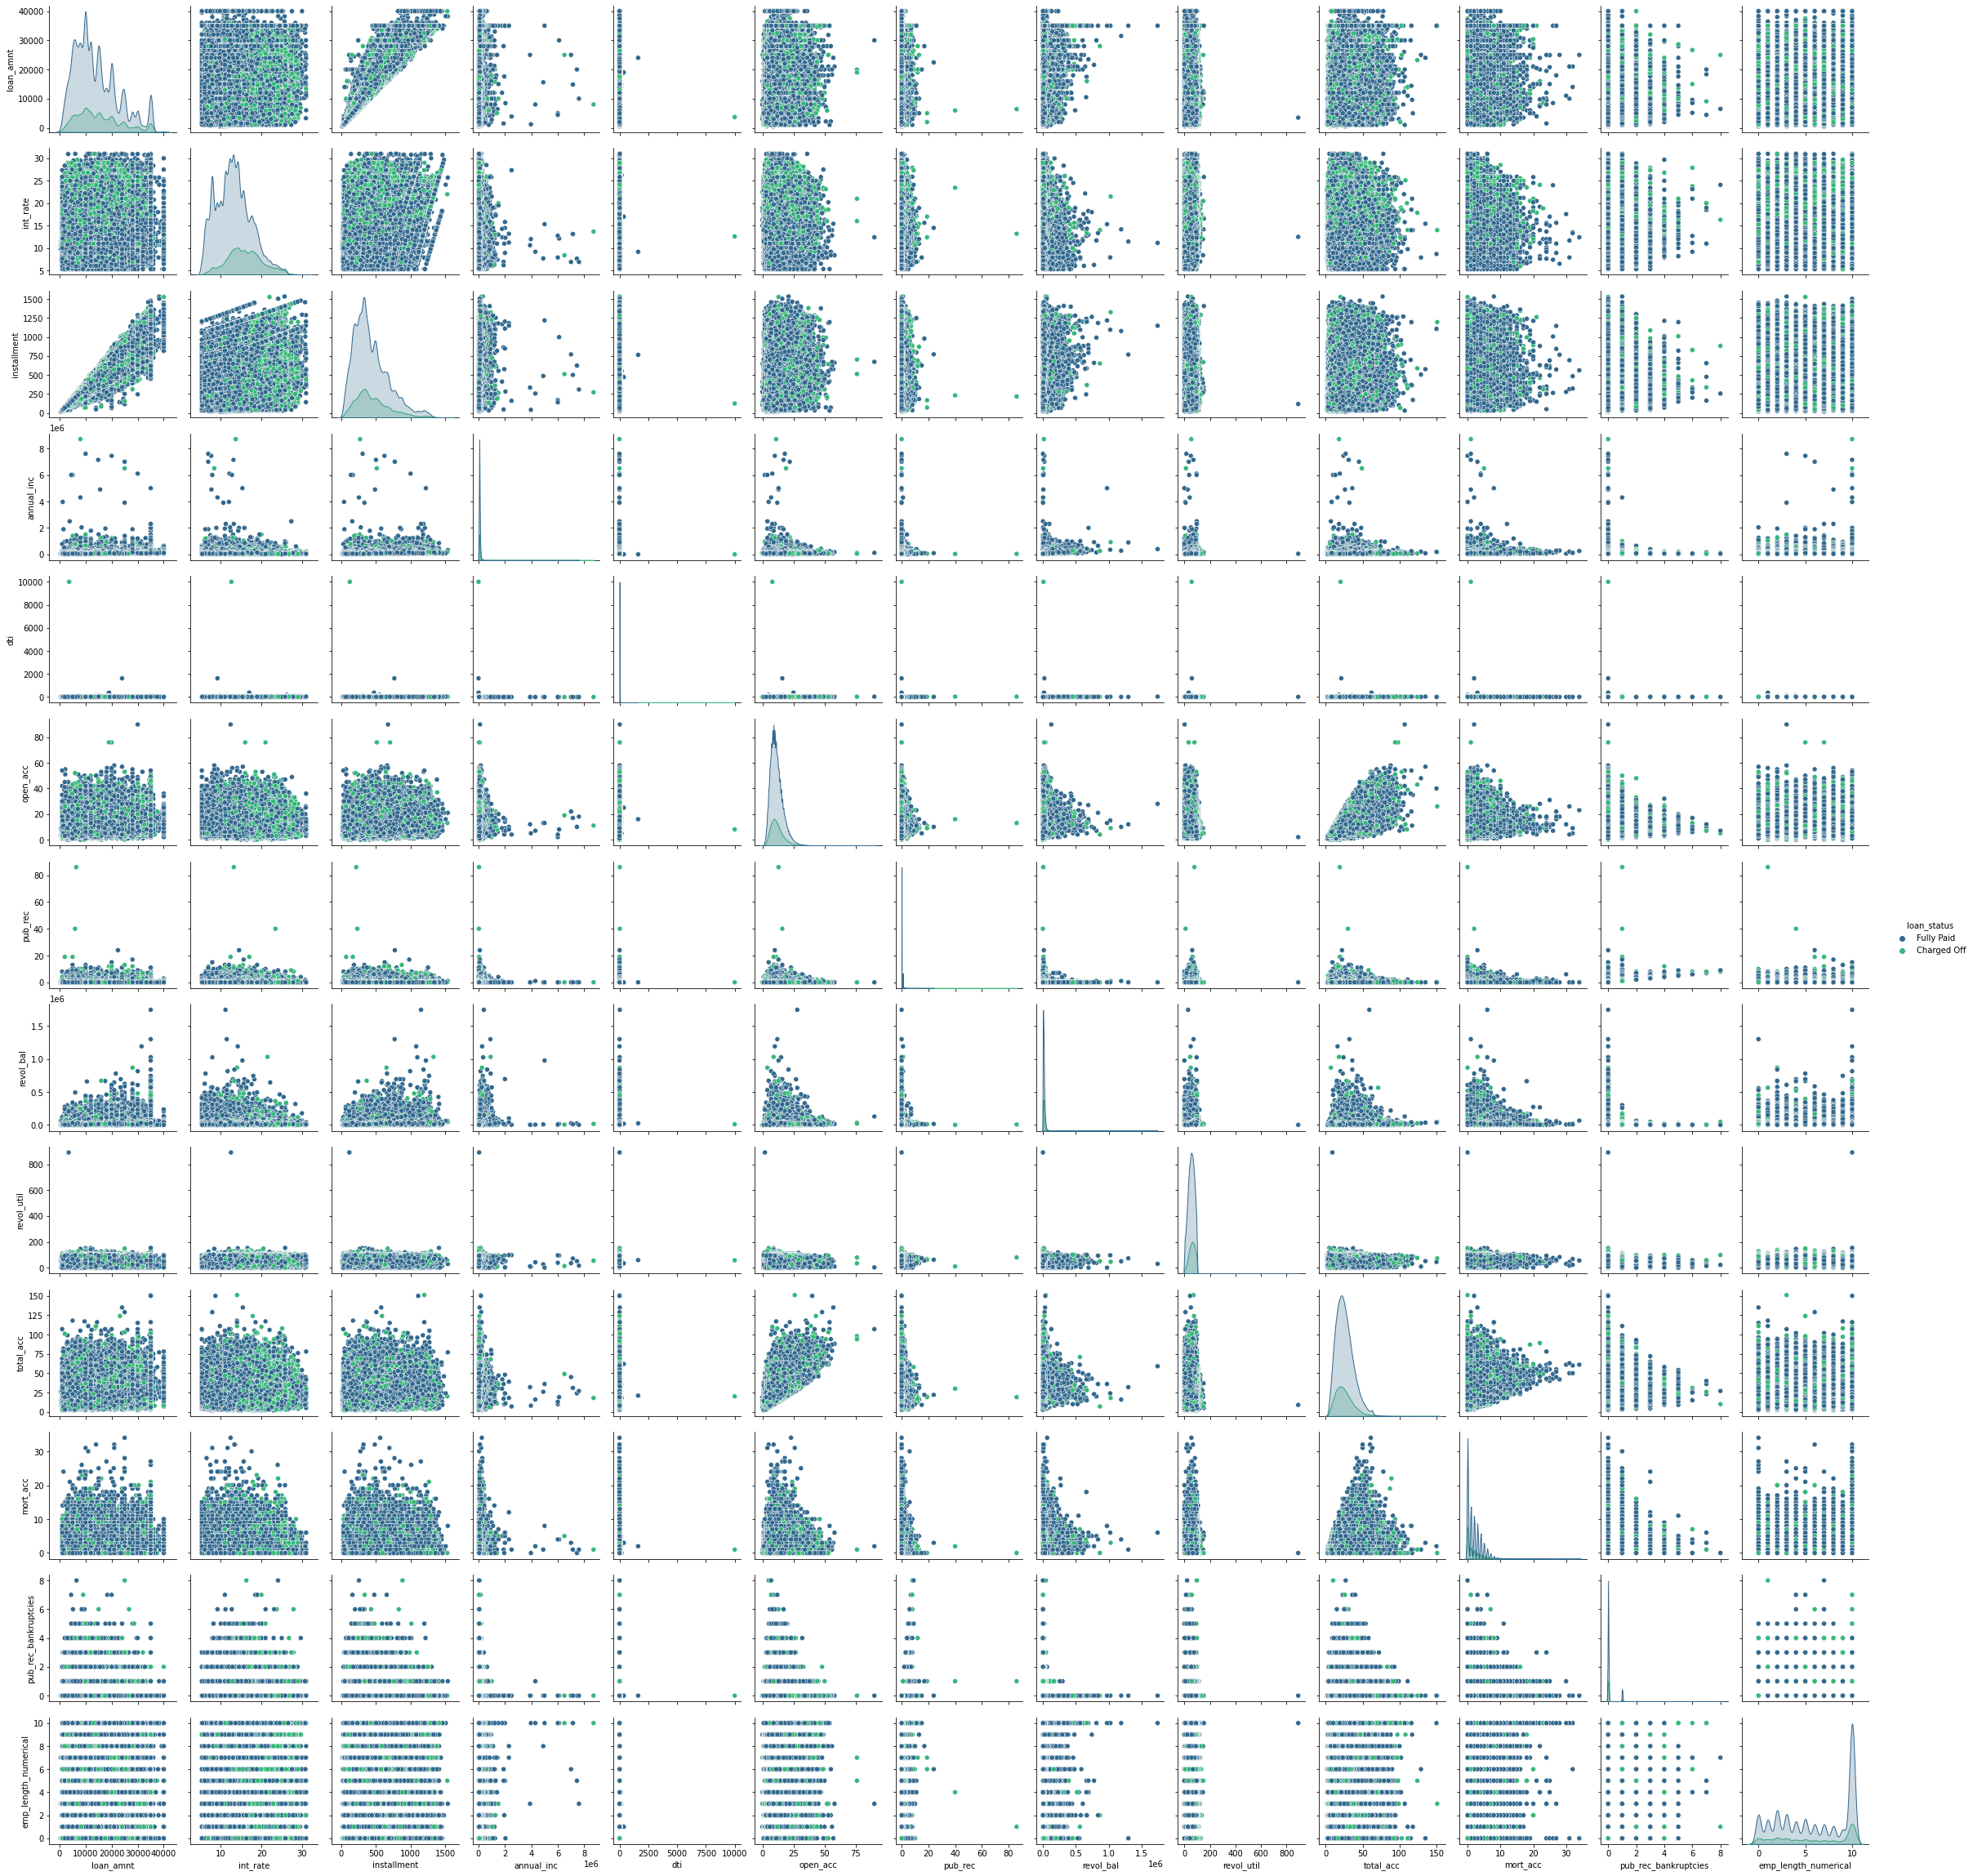

In [ ]:
#sns.pairplot(imported_dataset_df, palette = 'viridis', hue = 'loan_status')

In [37]:
# Convert issue_d to datetime attribute and generate issue date month and issue date year as derived (string) attributes
imported_dataset_df['issue_d'] = pd.to_datetime(imported_dataset_df['issue_d'])
imported_dataset_df['issue_d_month'] = imported_dataset_df['issue_d'].dt.month.astype(str)
imported_dataset_df['issue_d_year'] = imported_dataset_df['issue_d'].dt.year.astype(str)

In [38]:
# Convert earliest_cr_line to datetime attribute and generate earliest reported credit line date month and year as separate, derived (string) attributes
imported_dataset_df['earliest_cr_line'] = pd.to_datetime(imported_dataset_df['earliest_cr_line'])
imported_dataset_df['earliest_cr_line_month'] = imported_dataset_df['earliest_cr_line'].dt.month.astype(str)
imported_dataset_df['earliest_cr_line_year'] = imported_dataset_df['earliest_cr_line'].dt.year.astype(str)

In [ ]:
# Generate derived attribute "How long has person already taken credits before this loan?" (in years)

imported_dataset_df['credit_history_time'] = imported_dataset_df['issue_d'] - imported_dataset_df['earliest_cr_line']
imported_dataset_df['credit_history_time'] = imported_dataset_df['credit_history_time'].dt.days/365

In [41]:
# Generate list of categorical attributes
numerical_attributes = removed_dropped_attributes_dataframe.describe().T.index.to_list()

categorical_attributes = [i for i in removed_dropped_attributes_dataframe.columns if i not in numerical_attributes]

print(categorical_attributes)

['term', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'title', 'earliest_cr_line', 'initial_list_status', 'application_type', 'address_zip', 'address_state', 'issue_d_month', 'issue_d_year', 'earliest_cr_line_month', 'earliest_cr_line_year']


# TODO: VERIFICATION STATUS VARIABLE GROUPING

In [43]:
# TODO categorical plots


# # Generate dataframe that only contains remaining categorical attributes
# categorical_attributes_dataframe = removed_dropped_attributes_dataframe.copy(deep = True)[categorical_attributes]


# sns.catplot(x = 'term', data = imported_dataset_df, kind = 'count', palette = uzh_colors_no_shades)

# sns.catplot(x = 'home_ownership', data = imported_dataset_df, kind = 'count', palette = uzh_colors_full_not_colorsorted)

# sns.catplot(x = 'issue_d_year', data = imported_dataset_df, kind = 'count', palette = uzh_colors_full_not_colorsorted)









        







Text(0, 0.5, 'Count of occurences')

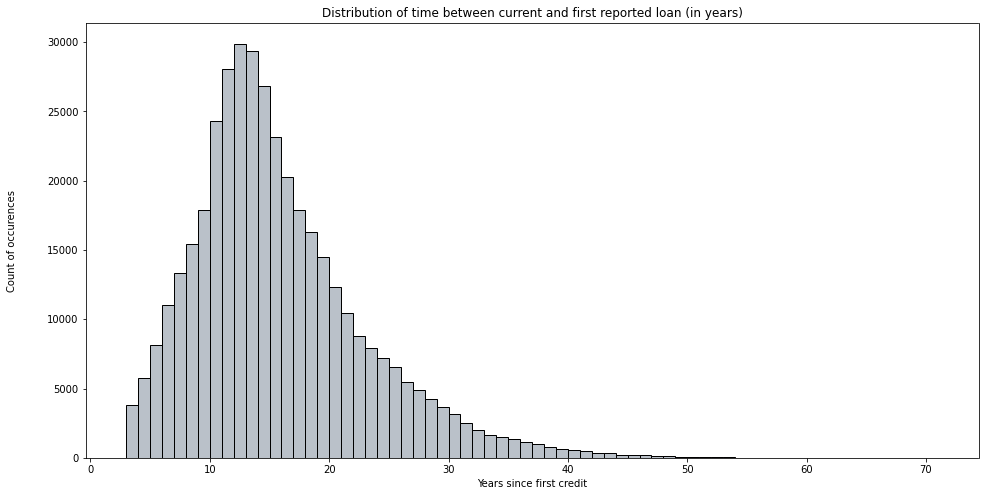

In [44]:
# Plot time between first credit and issue date of this loan
plt_title = 'Distribution of time between current and first reported loan (in years)'
plt_y_left_label = 'Count of occurences'
plt_x_label = 'Years since first credit'
plt.figure(figsize=(16, 8))
ax = sns.histplot(x= imported_dataset_df['credit_history_time'], binwidth = 1, color = uzh_colors_no_shades[1])
plt.title(plt_title)
plt.xlabel(plt_x_label)
ax.set_ylabel(plt_y_left_label, labelpad=30)

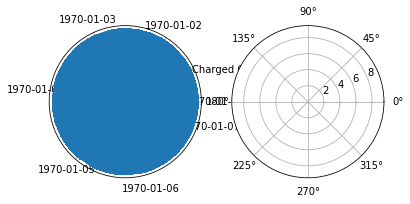

In [ ]:
# TODO Plot for seasonality analysis (issue month)
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(7,7))

for year in years:
    r = plot_data[year] # r is the radius, here the death counts
    i = years.index(year)
    ax.plot(theta, r, label=years[i])

title = '''Weekly deaths from Influenza and pneumonia, California 2015—2018'''

ax.set_title(title, va='bottom', y=1.1, loc='left', size=15, weight='bold')

ax.legend(loc=(1,0.9), frameon=False)

plt.show()

## 2.2 Initial data processing

In [194]:
# Data processing, as described in 2.1
## Deep copy to keep old dataset in tact
processed_dataset = imported_dataset_df.copy(deep = True)

## Drop all attributes that will be removed completly
processed_dataset = processed_dataset.drop(columns = ['emp_title', 'title', 'issue_d', 'issue_d_year', 'earliest_cr_line', 'earliest_cr_line_year', 'earliest_cr_line_month', 'installment', 'total_acc', 'emp_length_numerical', 'mort_acc'])

## Fill missing emp_length values with mode
processed_dataset['emp_length'] = processed_dataset['emp_length'].fillna(processed_dataset['emp_length'].mode()[0])
print('emp_length filled with mode approach, value taken: ' + processed_dataset['emp_length'].mode()[0])

## Drop items where either 'revol_util' or 'pub_rec_bankcruptcies' are having missing values
total_number_items_before = processed_dataset.shape[0]
processed_dataset = processed_dataset.dropna(axis = 0)
print('Lost ' + str(round(((1-(processed_dataset.shape[0]/total_number_items_before))*100),2)) + ' pct. of datapoints through removal on NaN values')

## Transform attributes
### Log transforms
processed_dataset['log_annual_inc'] = processed_dataset['annual_inc']
processed_dataset['log_dti'] = processed_dataset['dti']
processed_dataset['log_revol_bal'] = processed_dataset['revol_bal']
processed_dataset['log_loan_amnt'] = processed_dataset['loan_amnt']

### Address transforms
imported_dataset_df['address_zip'] = imported_dataset_df['address'].apply(lambda x: x[-5:])
imported_dataset_df['address_state'] = imported_dataset_df['address'].apply(lambda x: x[-8:-6])

### And drop untransformed variables
processed_dataset = processed_dataset.drop(columns = ['annual_inc','dti','revol_bal','loan_amnt', 'address'])

print('----- Processed dataset for modeling -----')
print('Number of remaining items: ' + str(processed_dataset.shape[0]))
print('Number of remaining attributes: ' + str(processed_dataset.shape[1]))
print('Thereof numerical independent attributes: ' + str(processed_dataset.describe().T.shape[0]))
print('Thereof categorical independent attributes: ' + str(processed_dataset.shape[1]-processed_dataset.describe().T.shape[0]-1))

emp_length filled with mode approach, value taken: 10+ years
Lost 0.2 pct. of datapoints through removal on NaN values
----- Processed dataset for modeling -----
Number of remaining items: 395219
Number of remaining attributes: 21
Thereof numerical independent attributes: 10
Thereof categorical independent attributes: 10


## 2.3 Naive models (without optimization)

### 2.3.0 Data standardization
Due to the fact, that the base logistic regression model needs data that is standardized, a normality shift will be performed here. 

Otherwise, Logistic regression model times out.

In [195]:
# Standardization according to https://scikit-learn.org/stable/modules/preprocessing.html & https://towardsdatascience.com/box-cox-transformation-explained-51d745e34203 & https://bit.ly/3yB0GUv
numerical = processed_dataset.columns[processed_dataset.dtypes == 'float64']
for i in numerical:
    if processed_dataset[i].min() > 0:
        transformed, lamb = boxcox(processed_dataset.loc[processed_dataset[i].notnull(), i])
        if np.abs(1 - lamb) > 0.02:
            processed_dataset.loc[processed_dataset[i].notnull(), i] = transformed


# Scaling according to https://bit.ly/3yB0GUv
sc = StandardScaler()
X_unbalance = traindata.drop('loan_status', axis=1)
y_unbalance = traindata['loan_status']
numerical = X_unbalance.columns[(X_unbalance.dtypes == 'float64') | (X_unbalance.dtypes == 'int64')].tolist()
X_unbalance[numerical] = sc.fit_transform(X_unbalance[numerical])

### 2.3.1 One-hot encoduing of categorical independent attributes & conversion of dependent variable to numeric

In [196]:
# One-hot encoding of categorical attributes & conversion of dependent variable to numeric
processed_dataset['loan_status'] = processed_dataset['loan_status'].map({'Fully Paid': 1, 'Charged Off': 0})
processed_dataset = pd.get_dummies(processed_dataset, drop_first=True)

### 2.3.2 Train-test-split

In [220]:
# Using stratified train-test-split with 70/30
random_seed = np.random.randint(0,50000)
traindata, testdata = train_test_split(processed_dataset, stratify = processed_dataset['loan_status'], test_size=0.3, random_state = random_seed)
testdata = testdata.reset_index(drop=True)
traindata = traindata.reset_index(drop=True)

In [198]:
# Function definition for computation of area under curve (ROC)
def createROC(models, X, y, X_test, y_test):
    # init arrays
    false_p, true_p = [], []

    for i in models.keys(): 
        models[i].fit(X, y)

        # calculate curve
        fp, tp, threshold = roc_curve(y_test, models[i].predict_proba(X_test)[:,1])

        # append values for specific model
        true_p.append(tp)
        false_p.append(fp)
        
    return true_p, false_p

### 2.3.3 Naive model comparison

In [200]:
# Create initial model performance estimate by using different models and then running inital validation with 5-fold CV
cross_validation_number = 5
models = {'LDA': LinearDiscriminantAnalysis(),
          'MNB': MultinomialNB(),
          'DT': DecisionTreeClassifier(),
          'RF': RandomForestClassifier(n_estimators = 100),
          'LR': LogisticRegression(C = 1, max_iter = 10000)}

unbalset = {}
for i in models.keys():
    scores = cross_val_score(models[i], X_unbalance - X_unbalance.min() + 1, y_unbalance, cv = cross_validation_number)
    unbalset[i] = scores
    print('-----Model :' + i)
    print('Performance individual runs: ' + str(scores))
    print('Mean overall performance: ' + str(np.mean(scores)))

-----Model :LDA
Performance individual runs: [0.88872422 0.88773021 0.88857964 0.88808964 0.88657148]
Mean overall performance: 0.8879390383731511
-----Model :MNB
Performance individual runs: [0.80385317 0.80385317 0.80381703 0.80384963 0.80388578]
Mean overall performance: 0.8038517566478312
-----Model :DC
Performance individual runs: [0.83439663 0.83314959 0.83145072 0.83545997 0.82954997]
Mean overall performance: 0.8328013772024375
-----Model :RF
Performance individual runs: [0.88888688 0.88812781 0.88867    0.88881258 0.88649919]
Mean overall performance: 0.8881992926633018
-----Model :LR
Performance individual runs: [0.88950136 0.88888688 0.8892122  0.88868607 0.88593891]
Mean overall performance: 0.8884450836781456


As random forests are main concern for this work (and because their model performance looks promising), detailed tuning and optimization will be performed for the random forest model.

### 2.2.4 Model evaluation

In [201]:
# Test set creation (unbalanced test set)
X_test = testdata.drop('loan_status', axis=1)
y_test = testdata['loan_status']

# Scaling datatypes by using StandardScaler
numerical = X_test.columns[(X_test.dtypes == 'float64') | (X_test.dtypes == 'int64')].tolist()
X_test[numerical] = sc.fit_transform(X_test[numerical])

In [202]:
# Computing the ROC curves and storing the resulting true and false positives
tp_unbalset, fp_unbalset = createROC(models, X_unbalance - X_unbalance.min() + 1, y_unbalance, X_test - X_test.min() + 1, y_test)

In [231]:
# Fitting Random Forest model to the test set
model =  RandomForestClassifier(n_estimators = 100)
model.fit(X_unbalance, y_unbalance)
predict = model.predict(X_test)

print('------- Classification report  -------')
print(classification_report(y_test, predict))

------- Classification report  -------
              precision    recall  f1-score   support

           0       0.99      0.79      0.88     23257
           1       0.95      1.00      0.97     95309

    accuracy                           0.96    118566
   macro avg       0.97      0.89      0.92    118566
weighted avg       0.96      0.96      0.95    118566



Text(0.5, 1.0, 'Confusion matrix for random forest model')

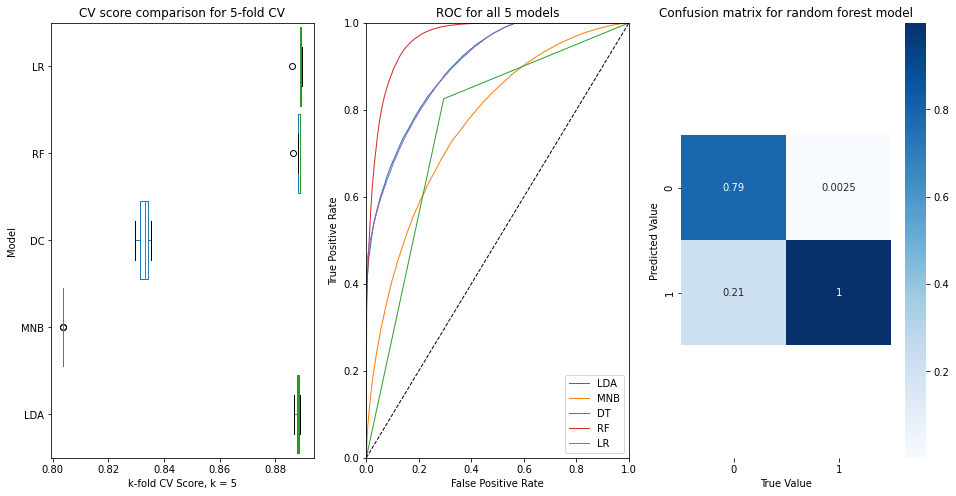

In [232]:
# Generate metrics for judgement of model performance (CV score comparison, ROC and confusion matrix for Random Forest)
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,8))

ax = pd.DataFrame(unbalset).boxplot(widths=(0.9,0.9,0.9,0.9,0.9), grid=False, vert=False, ax=axes[0])
ax.set_ylabel('Model')
ax.set_xlabel('k-fold CV Score, k = ' + str(cross_validation_number))
ax.set_title('CV score comparison for 5-fold CV')

for i in range(0, len(tp_unbalset)):
    axes[1].plot(fp_unbalset[i], tp_unbalset[i], lw=1)

axes[1].plot([0, 1], [0, 1], '--k', lw=1)
axes[1].legend(models.keys())
axes[1].set_ylabel('True Positive Rate')
axes[1].set_xlabel('False Positive Rate')
axes[1].set_xlim(0,1)
axes[1].set_ylim(0,1)
axes[1].set_title('ROC for all 5 models')

cm = confusion_matrix(y_test, predict).T
cm = cm.astype('float')/cm.sum(axis=0)

ax = sns.heatmap(cm, annot=True, cmap='Blues', ax=axes[2])
ax.set_xlabel('True Value')
ax.set_ylabel('Predicted Value')
ax.axis('equal')
axes[2].set_title('Confusion matrix for random forest model')



### 2.2.5 Intermediate conlusion

Random Forest model looks good with initial parameter selection but false positive rate is still quite high potentially due to unbalanced initial dataset.
Two model tweaks could now be tried, firstly training the model on a balanced set of loan_status and secondly tuning hyperparameters of the models.

## 2.3 Model optimization
### 2.3.1 Training model on balanced dataset

In [224]:
# Resampling by choosing equal defaults and repaid laons
y_default = traindata[traindata['loan_status'] == 0]
n_paid = traindata[traindata['loan_status'] == 1].sample(n = len(y_default), random_state = random_seed) 

# Creating a new dataframe for balanced set
data = y_default.append(n_paid) 

# Creating the independent and dependent array
X_balance = data.drop('loan_status', axis=1)
y_balance = data['loan_status']

print('Control, difference between number defaulted and repaid loans: ' + str(len(n_paid)-len(y_default)))

Control, difference between number defaulted and repaid loans: 0


C:\Users\cronus_win11\AppData\Local\Temp\ipykernel_6024\4149594151.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = y_default.append(n_paid)


In [233]:
# Pipeline from before again (scaling & model naive test)

# Scaling
numerical = X_balance.columns[(X_balance.dtypes == 'float64') | (X_balance.dtypes == 'int64')].tolist()
X_balance[numerical] = sc.fit_transform(X_balance[numerical])

# Running the dataset through each iteration of the model once again
models = models = {'LDA': LinearDiscriminantAnalysis(),
          'MNB': MultinomialNB(),
          'DT': DecisionTreeClassifier(),
          'RF': RandomForestClassifier(n_estimators = 100),
          'LR': LogisticRegression(C = 1, max_iter = 10000)}

balset = {}
for i in models.keys():
    scores = cross_val_score(models[i], X_balance - X_balance.min() + 1,
                                    y_balance, scoring='roc_auc', cv=3)
    balset[i] = scores
    print(i, scores, np.mean(scores))


LDA [0.90132499 0.89972127 0.9030246 ] 0.9013569566435354
MNB [0.76984064 0.76923153 0.77470799] 0.7712600527186283
DT [0.74478965 0.74505909 0.74751921] 0.7457893170186655
RF [0.88595779 0.88670503 0.88929249] 0.8873184370923343
LR [0.9015653  0.9016322  0.90490418] 0.9027005625065466


In [228]:
# Fitting Random Forest model to the test set
model =  RandomForestClassifier(n_estimators = 100)
model.fit(X_balance, y_balance)
predict = model.predict(X_test)

print('------- Classification report  -------')
print(classification_report(y_test, predict))

------- Classification report  -------
              precision    recall  f1-score   support

           0       0.50      0.93      0.65     23257
           1       0.98      0.77      0.86     95309

    accuracy                           0.80    118566
   macro avg       0.74      0.85      0.76    118566
weighted avg       0.88      0.80      0.82    118566



Text(0.5, 1.0, 'Confusion matrix for random forest model')

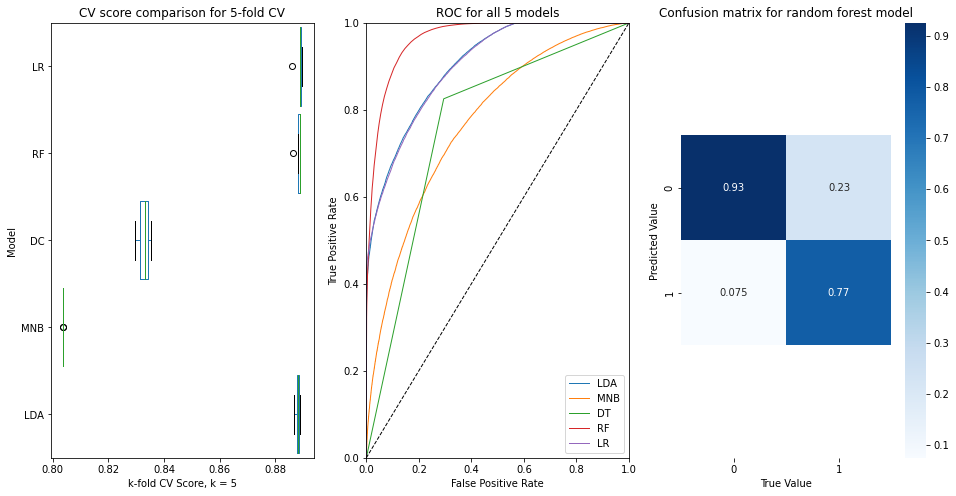

In [229]:
# Generate metrics for judgement of model performance (CV score comparison, ROC and confusion matrix for Random Forest)
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,8))

ax = pd.DataFrame(unbalset).boxplot(widths=(0.9,0.9,0.9,0.9,0.9), grid=False, vert=False, ax=axes[0])
ax.set_ylabel('Model')
ax.set_xlabel('k-fold CV Score, k = ' + str(cross_validation_number))
ax.set_title('CV score comparison for 5-fold CV')

for i in range(0, len(tp_unbalset)):
    axes[1].plot(fp_unbalset[i], tp_unbalset[i], lw=1)

axes[1].plot([0, 1], [0, 1], '--k', lw=1)
axes[1].legend(models.keys())
axes[1].set_ylabel('True Positive Rate')
axes[1].set_xlabel('False Positive Rate')
axes[1].set_xlim(0,1)
axes[1].set_ylim(0,1)
axes[1].set_title('ROC for all 5 models')

cm = confusion_matrix(y_test, predict).T
cm = cm.astype('float')/cm.sum(axis=0)

ax = sns.heatmap(cm, annot=True, cmap='Blues', ax=axes[2])
ax.set_xlabel('True Value')
ax.set_ylabel('Predicted Value')
ax.axis('equal')
axes[2].set_title('Confusion matrix for random forest model')

With the balanced dataset, the false positive rate is reduced, but the false negative rate is now spiking.

### 2.3.2 Parameter tuning

In [240]:
# Pipeline from before again (scaling & model naive test)

# Scaling
numerical = X_balance.columns[(X_balance.dtypes == 'float64') | (X_balance.dtypes == 'int64')].tolist()
X_balance[numerical] = sc.fit_transform(X_balance[numerical])

# Running the dataset through each iteration of the model once again
models = { 'RF_n100_criterion_gini': RandomForestClassifier(n_estimators = 100),
                    'RF_n1000_criterion_gini': RandomForestClassifier(n_estimators = 1000),
                    'RF_n10000_criterion_gini': RandomForestClassifier(n_estimators = 10000),
                    'RF_n100_criterion_entropy': RandomForestClassifier(n_estimators = 100, criterion = 'entropy'),
                    'RF_n100_criterion_log_loss': RandomForestClassifier(n_estimators = 100, criterion = 'log_loss')}

balset = {}
for i in models.keys():
    scores = cross_val_score(models[i], X_balance - X_balance.min() + 1,
                                    y_balance, scoring='roc_auc', cv=3)
    balset[i] = scores
    print(i, scores, np.mean(scores))


RF_n100_criterion_gini [0.88664083 0.88660128 0.88934419] 0.8875287666934414
RF_n1000_criterion_gini [0.88884968 0.89004848 0.89321761] 0.8907052579545555
RF_n10000_criterion_gini [0.88943308 0.89087679 0.893032  ] 0.8911139539707205
RF_n100_criterion_entropy [0.8862745  0.88810691 0.8911047 ] 0.8884953707200859
RF_n100_criterion_log_loss [nan nan nan] nan


c:\Users\cronus_win11\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
3 fits failed out of a total of 3.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\cronus_win11\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\cronus_win11\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "c:\Users\cronus_win11\AppData\Local\Programs\Python\Python310\lib\site-pac

In [237]:
# Fitting best Random Forest model to the test set
model =  RandomForestClassifier(n_estimators = 100, criterion = 'gini')
model.fit(X_balance, y_balance)
predict = model.predict(X_test)

print('------- Classification report  -------')
print(classification_report(y_test, predict))

------- Classification report  -------
              precision    recall  f1-score   support

           0       0.50      0.92      0.65     23257
           1       0.98      0.77      0.86     95309

    accuracy                           0.80    118566
   macro avg       0.74      0.85      0.76    118566
weighted avg       0.88      0.80      0.82    118566



Text(0.5, 1.0, 'Confusion matrix for random forest model')

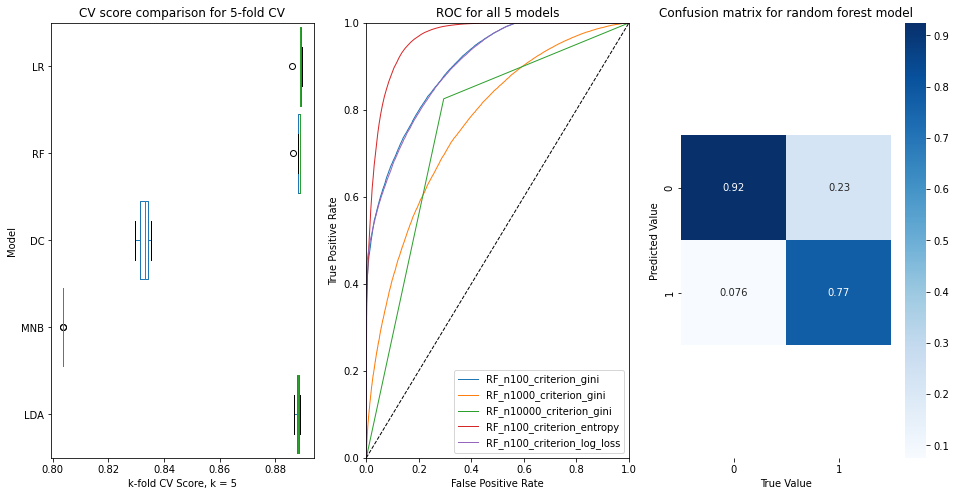

In [238]:
# Generate metrics for judgement of model performance (CV score comparison, ROC and confusion matrix for Random Forest)
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,8))

ax = pd.DataFrame(unbalset).boxplot(widths=(0.9,0.9,0.9,0.9,0.9), grid=False, vert=False, ax=axes[0])
ax.set_ylabel('Model')
ax.set_xlabel('k-fold CV Score, k = ' + str(cross_validation_number))
ax.set_title('CV score comparison for 5-fold CV')

for i in range(0, len(tp_unbalset)):
    axes[1].plot(fp_unbalset[i], tp_unbalset[i], lw=1)

axes[1].plot([0, 1], [0, 1], '--k', lw=1)
axes[1].legend(models.keys())
axes[1].set_ylabel('True Positive Rate')
axes[1].set_xlabel('False Positive Rate')
axes[1].set_xlim(0,1)
axes[1].set_ylim(0,1)
axes[1].set_title('ROC for all 5 models')

cm = confusion_matrix(y_test, predict).T
cm = cm.astype('float')/cm.sum(axis=0)

ax = sns.heatmap(cm, annot=True, cmap='Blues', ax=axes[2])
ax.set_xlabel('True Value')
ax.set_ylabel('Predicted Value')
ax.axis('equal')
axes[2].set_title('Confusion matrix for random forest model')

# Hyperparameter tuning using grid search

In [295]:
# Define Parameters
max_depth=[2, 8, 16]
n_estimators = [64, 128, 256]
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)

# Split the data into x_train and y_train data sets
x_train, x_test, y_train, y_test = train_test_split(processed_dataset.drop(columns=['loan_status']), processed_dataset['loan_status'] , train_size=0.7, random_state = random_seed)

# Build the grid search
dfrst = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)
grid = GridSearchCV(estimator=dfrst, param_grid=param_grid, cv = 5)
grid_results = grid.fit(x_train, y_train)

# Summarize the results in a readable format
print("Best: {0}, using {1}".format(grid_results.cv_results_['mean_test_score'], grid_results.best_params_))
results_df = pd.DataFrame(grid_results.cv_results_)
results_df

Best: [0.80394212 0.80394212 0.80394212 0.88424851 0.88749807 0.88781615
 0.88821376 0.88822461 0.8881993 ], using {'max_depth': 16, 'n_estimators': 128}


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       3.581740      0.081460         0.186184        0.004780   
1       6.907620      0.051388         0.346379        0.006280   
2      13.607550      0.195868         0.677122        0.025972   
3      10.702184      0.085696         0.283800        0.005268   
4      21.297026      0.533219         0.546535        0.008100   
5      41.373852      0.667989         1.051639        0.024682   
6      19.387990      0.277504         0.534279        0.023372   
7      38.217729      0.568958         1.008089        0.024346   
8      73.616586      1.485609         1.842814        0.090756   

  param_max_depth param_n_estimators                                  params  \
0               2                 64    {'max_depth': 2, 'n_estimators': 64}   
1               2                128   {'max_depth': 2, 'n_estimators': 128}   
2               2                256   {'max_depth': 2, 'n_estimators': 256}   
3               8                 64    {'max_depth': 8, 'n_estimators': 64}   
4               8                128   {'max_depth': 8, 'n_estimators': 128}   
5               8                256   {'max_depth': 8, 'n_estimators': 256}   
6              16                 64   {'max_depth': 16, 'n_estimators': 64}   
7              16                128  {'max_depth': 16, 'n_estimators': 128}   
8              16                256  {'max_depth': 16, 'n_estimators': 256}   

   split0_test_score  split1_test_score  split2_test_score  split3_test_score  \
0           0.803944           0.803944           0.803944           0.803940   
1           0.803944           0.803944           0.803944           0.803940   
2           0.803944           0.803944           0.803944           0.803940   
3           0.885760           0.885345           0.879399           0.883192   
4           0.887351           0.884206           0.888092           0.888740   
5           0.886845           0.886917           0.887260           0.888740   
6           0.887351           0.887423           0.888110           0.888831   
7           0.887351           0.887387           0.888164           0.888831   
8           0.887405           0.887351           0.888146           0.888795   

   split4_test_score  mean_test_score  std_test_score  rank_test_score  
0           0.803940         0.803942        0.000002                7  
1           0.803940         0.803942        0.000002                7  
2           0.803940         0.803942        0.000002                7  
3           0.887547         0.884249        0.002793                6  
4           0.889102         0.887498        0.001751                5  
5           0.889319         0.887816        0.001017                4  
6           0.889355         0.888214        0.000783                2  
7           0.889391         0.888225        0.000800                1  
8           0.889301         0.888199        0.000764                3

In [ ]:
# Extract the best decision forest 
best_clf = grid_results.best_estimator_
y_pred = best_clf.predict(x_test)

# Create a confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)

# Create heatmap from the confusion matrix
%matplotlib inline
class_names=[False, True] # name  of classes
fig, ax = plt.subplots(figsize=(7, 6))
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = [0.5, 1.5]
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

Text(0.5, 0, 'Tree depth')

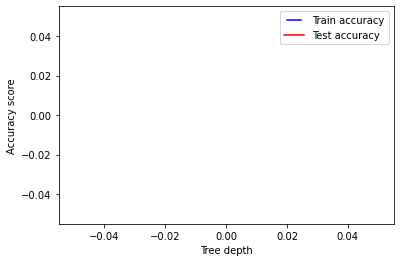

In [296]:
max_depths = np.linspace(1, 50, 50, endpoint=True)

train_results = []
test_results = []

for i in max_depths:
    dt = RandomForestClassifier(max_depth=i)
    dt.fit(x_train, y_train)    
    #compute accuracy for train data
    loan_status = dt.predict(x_train)
    errors = abs(loan_status - y_train)
    # Calculate mean absolute percentage error (MAPE)
    mape = 100 * (errors / y_train)
    # Calculate and display accuracy
    accuracy = 100 - np.mean(mape)
    #append results of accuracy
    train_results.append(accuracy)
    
    #now again for test data
    loan_status = dt.predict(x_test)
    errors = abs(loan_status - y_test)
    # Calculate mean absolute percentage error (MAPE)
    mape = 100 * (errors / y_test)
    # Calculate and display accuracy
    accuracy = 100 - np.mean(mape)
    #append results of accuracy
    test_results.append(accuracy)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label='Train accuracy')
line2, = plt.plot(max_depths, test_results, 'r', label= 'Test accuracy')

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy score')
plt.xlabel('Tree depth')

In [297]:
from sklearn.model_selection import GridSearchCV

max_features_range = np.arange(1,6,1)
n_estimators_range = np.arange(10,210,10)
param_grid = dict(max_features=max_features_range, n_estimators=n_estimators_range)
rf = RandomForestClassifier()
grid = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
X_train, X_test, Y_train, Y_test = train_test_split(processed_dataset.drop(columns=['loan_status']), processed_dataset['loan_status'], test_size=0.3)
grid.fit(X_train, Y_train)
print("Optimal parameters %s accuracy score of  %0.2f"
      % (grid.best_params_, grid.best_score_))

# 0. Other things

c:\Users\cronus_win11\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


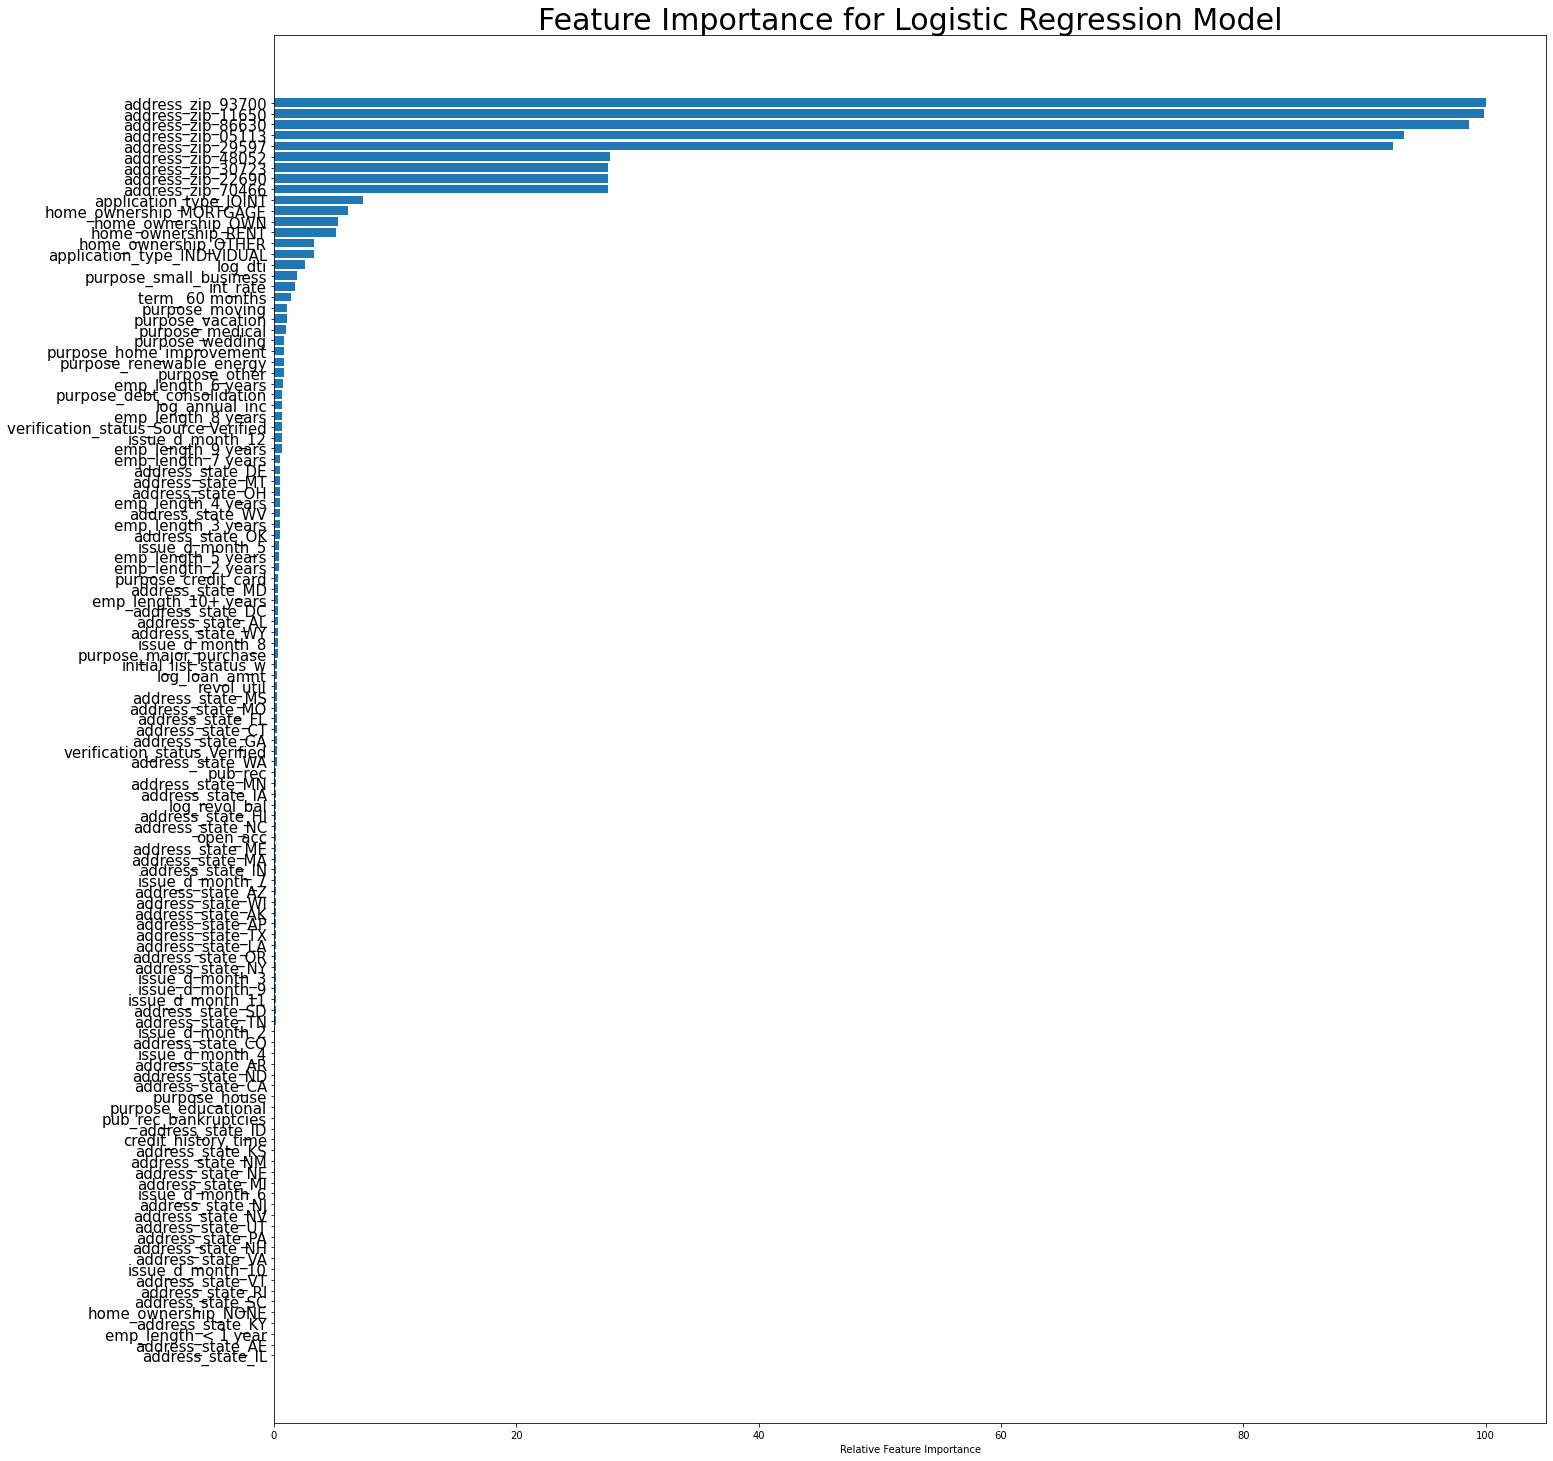

In [234]:
# Feature importance Logistic regression model


feature_importance = abs(model.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize=(20,20))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_test.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')

plt.tight_layout()
plt.title("Feature Importance for Logistic Regression Model", fontsize=30)
plt.yticks(fontsize=15)
plt.show()



In [263]:
# Feature importance for arbitrary model
# Fitting best Random Forest model to the test set
model =  RandomForestClassifier(n_estimators = 100, criterion = 'gini')
model.fit(X_balance, y_balance)

# Make predictions on test data
predictions = model.predict(X_balance)

# Get numerical feature importances
importances = list(model.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X_balance, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: int_rate             Importance: 0.08
Variable: address_zip_11650    Importance: 0.07
Variable: address_zip_86630    Importance: 0.07
Variable: address_zip_93700    Importance: 0.07
Variable: revol_util           Importance: 0.05
Variable: log_annual_inc       Importance: 0.05
Variable: log_dti              Importance: 0.05
Variable: address_zip_05113    Importance: 0.05
Variable: address_zip_29597    Importance: 0.05
Variable: credit_history_time  Importance: 0.04
Variable: log_revol_bal        Importance: 0.04
Variable: log_loan_amnt        Importance: 0.04
Variable: open_acc             Importance: 0.03
Variable: term_ 60 months      Importance: 0.02
Variable: pub_rec              Importance: 0.01
Variable: emp_length_10+ years Importance: 0.01
Variable: home_ownership_MORTGAGE Importance: 0.01
Variable: home_ownership_RENT  Importance: 0.01
Variable: verification_status_Source Verified Importance: 0.01
Variable: verification_status_Verified Importance: 0.01
Variable: purp

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

Text(0.5, 1.0, 'Cumulative Importances for Random Forest model')

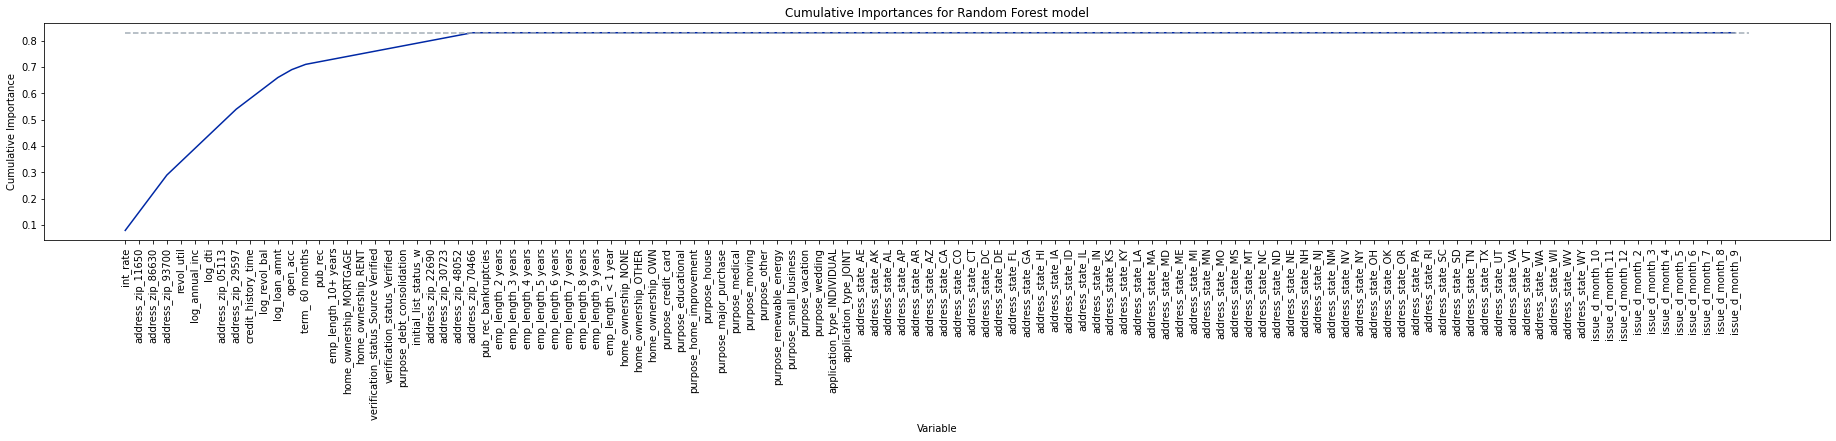

In [288]:
# Plot cumulative feature importance for random forest model
# list of x locations for plotting
x_values = list(range(len(importances)))

# List of features sorted from most to least important
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]

# Cumulative importances
cumulative_importances = np.cumsum(sorted_importances)

plt.figure(figsize=(32, 4))

# Make a line graph
plt.plot(x_values, cumulative_importances, color= uzh_colors_no_shades[0])

# Draw line at 83% of importance retained
plt.hlines(y = 0.83, xmin=0, xmax=len(sorted_importances), color = uzh_colors_no_shades[1], linestyles = 'dashed')

# Format x ticks and labels
plt.xticks(x_values, sorted_features, rotation = 'vertical')

# Axis labels and title
plt.xlabel('Variable')
plt.ylabel('Cumulative Importance')
plt.title('Cumulative Importances for Random Forest model')


Shows that basically cutoff can be performed after zipcode attributes as other attributes do not add additional information to the model (26 attributes)